In [593]:
#Import Tools
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import json
import requests
import openpyxl

In [594]:
# Gives adjacency dictionary (not mine)
edge_dict={}
def create_edge_dict(graph):
    for i, n in G.adjacency():
        # print("i is",i)
        # print("n is",n)
        edge_dict[i] = list(n)
    return edge_dict

# Gives duplicate items in a list (not mine)
def list_duplicates(seq):
  seen = set()
  seen_add = seen.add
  # adds all elements it doesn't know yet to seen and all other to seen_twice
  seen_twice = set( x for x in seq if x in seen or seen_add(x) )
  # turn the set into a list (as requested)
  return list( seen_twice )


#(https://www.geeksforgeeks.org/python-merge-two-lists-into-list-of-tuples/)
def merge(list1, list2):
      
    merged_list = []
    for i in range(max((len(list1), len(list2)))):
  
        while True:
            try:
                tup = (list1[i], list2[i])
            except IndexError:
                if len(list1) > len(list2):
                    list2.append('')
                    tup = (list1[i], list2[i])
                elif len(list1) < len(list2):
                    list1.append('')
                    tup = (list1[i], list2[i])
                continue
  
            merged_list.append(tup)
            break
    return merged_list


# function to check whether the list is empty or not
def is_list_empty(list):
    # checking the length
    if len(list) == 0:
        # returning true as length is 0
        return True
    # returning false as length is greater than 0
    return False

In [595]:
# #retrieve data regarding vacant spaces
from openpyxl import load_workbook
# workbook = load_workbook(filename="Node Information.xlsx")
# workbook.sheetnames
# sheet1 = workbook.worksheets[0]
# sheet2 = workbook.worksheets[1]

# #create dictionary based on excel worksheet
# vacant_spaces={}
# for value in sheet1.iter_rows(min_row=2, values_only=True):
#     for index,item in enumerate(value):
#         vacant_spaces[value[0]]={}
#         vacant_spaces[value[0]]["location"]=value[1]
#         vacant_spaces[value[0]]["tag"]=value[6]
#         vacant_spaces[value[0]]["building"]=value[3]
#         vacant_spaces[value[0]]["size_real"]=value[2]
#         vacant_spaces[value[0]]["loc_building"]=value[4]
#         vacant_spaces[value[0]]["orientation"]=value[5]
#         vacant_spaces[value[0]]["node_type"]=value[7]

#interpret data
#Rules:
#structure (roof:1,ground:3,outside:3,basement:3,intermediate:2)
#solar (roof:3,
#       basement:1
#       ground & S,SW,SE:3,
#       ground $ E,W:2
#       ground $ N,NE,NW:1
#       outside & S,SW,SE:3,
#       outside $ E,W:2
#       outside $ N,NE,NW:1
#       intermediate & S,SW,SE:3,
#       intermediate & E,W:2
#       intermediate & N,NE,NW:1
#size (0-100 size:1)
#     (101-500 size:2)
#     (500-... size:3)

# for space in vacant_spaces:
#     if vacant_spaces[space]["loc_building"]=="roof":
#         vacant_spaces[space]["structure"]=1
#         vacant_spaces[space]["solar"]=3
#     if vacant_spaces[space]["loc_building"]=="basement":
#         vacant_spaces[space]["structure"]=3
#         vacant_spaces[space]["solar"]=1
#     if (vacant_spaces[space]["loc_building"]=="ground") and (((vacant_spaces[space]["orientation"])=="S") or ((vacant_spaces[space]["orientation"])=="SE") or ((vacant_spaces[space]["orientation"])=="SW")):
#         vacant_spaces[space]["solar"]=3
#         vacant_spaces[space]["structure"]=3
#     if (vacant_spaces[space]["loc_building"]=="ground") and (((vacant_spaces[space]["orientation"])=="N") or ((vacant_spaces[space]["orientation"])=="NE") or ((vacant_spaces[space]["orientation"])=="NW")):
#         vacant_spaces[space]["solar"]=1
#         vacant_spaces[space]["structure"]=3
#     if (vacant_spaces[space]["loc_building"]=="ground") and (((vacant_spaces[space]["orientation"])=="E") or ((vacant_spaces[space]["orientation"])=="W")):
#         vacant_spaces[space]["solar"]=2
#         vacant_spaces[space]["structure"]=3
#     if (vacant_spaces[space]["loc_building"]=="intermediate") and (((vacant_spaces[space]["orientation"])=="S") or ((vacant_spaces[space]["orientation"])=="SE") or ((vacant_spaces[space]["orientation"])=="SW")):
#         vacant_spaces[space]["solar"]=3
#         vacant_spaces[space]["structure"]=2
#     if (vacant_spaces[space]["loc_building"]=="intermediate") and (((vacant_spaces[space]["orientation"])=="N") or ((vacant_spaces[space]["orientation"])=="NE") or ((vacant_spaces[space]["orientation"])=="NW")):
#         vacant_spaces[space]["solar"]=1
#         vacant_spaces[space]["structure"]=2
#     if (vacant_spaces[space]["loc_building"]=="intermediate") and (((vacant_spaces[space]["orientation"])=="E") or ((vacant_spaces[space]["orientation"])=="W")):
#         vacant_spaces[space]["solar"]=2
#         vacant_spaces[space]["structure"]=2
#     if (vacant_spaces[space]["loc_building"]=="outside") and (((vacant_spaces[space]["orientation"])=="S") or ((vacant_spaces[space]["orientation"])=="SE") or ((vacant_spaces[space]["orientation"])=="SW")):
#         vacant_spaces[space]["solar"]=3
#         vacant_spaces[space]["structure"]=3
#     if (vacant_spaces[space]["loc_building"]=="outside") and (((vacant_spaces[space]["orientation"])=="N") or ((vacant_spaces[space]["orientation"])=="NE") or ((vacant_spaces[space]["orientation"])=="NW")):
#         vacant_spaces[space]["solar"]=1
#         vacant_spaces[space]["structure"]=3
#     if (vacant_spaces[space]["loc_building"]=="outside") and (((vacant_spaces[space]["orientation"])=="E") or ((vacant_spaces[space]["orientation"])=="W")):
#         vacant_spaces[space]["solar"]=2
#         vacant_spaces[space]["structure"]=3

# #interpret size based on predefined ranges
# for space in vacant_spaces:
#     if vacant_spaces[space]["size_real"]<=100:
#         vacant_spaces[space]["size"]=1
#     if (vacant_spaces[space]["size_real"]>100) and (vacant_spaces[space]["size_real"]<=500) :
#         vacant_spaces[space]["size"]=2
#     if (vacant_spaces[space]["size_real"]>500):
#         vacant_spaces[space]["size"]=3
    
# #remove orientation,loc_building,size_real
# for space in vacant_spaces:
#     vacant_spaces[space].pop("orientation")
#     vacant_spaces[space].pop("size_real")
#     vacant_spaces[space].pop("loc_building")   
     
# #retrieve waste sources
# #create dictionary based on excel worksheet
# wastes={}
# for value in sheet2.iter_rows(min_row=2, values_only=True):
#     for index,item in enumerate(value):
#         wastes[value[0]]={}
#         wastes[value[0]]["location"]=value[1]
#         wastes[value[0]]["source"]=value[2]
#         wastes[value[0]]["tag"]=value[5]
#         wastes[value[0]]["type"]=value[3]
#         wastes[value[0]]["quantity"]=value[4]
#         wastes[value[0]]["node_type"]="waste"


# #assign ranges to quantities
# for waste in wastes:
#     if wastes[waste]["type"]=="W1":
#         if wastes[waste]["quantity"]<= 91852:
#             wastes[waste]["size"]=1
#         if (wastes[waste]["quantity"]>91852) and (wastes[waste]["quantity"]<=459261):
#             wastes[waste]["size"]=2
#         if wastes[waste]["quantity"]>459261:
#             wastes[waste]["size"]=3
#     if wastes[waste]["type"]=="W2":
#         if wastes[waste]["quantity"]<= 25000:
#             wastes[waste]["size"]=1
#         if (wastes[waste]["quantity"]>25000) and (wastes[waste]["quantity"]<=125000):
#             wastes[waste]["size"]=2
#         if wastes[waste]["quantity"]>125000:
#             wastes[waste]["size"]=3
#     if wastes[waste]["type"]=="W3":
#         if wastes[waste]["quantity"]<= 5906:
#             wastes[waste]["size"]=1
#         if (wastes[waste]["quantity"]>5906) and (wastes[waste]["quantity"]<=29531):
#             wastes[waste]["size"]=2
#         if wastes[waste]["quantity"]>29531:
#             wastes[waste]["size"]=3
#     if wastes[waste]["type"]=="W4":
#         if wastes[waste]["quantity"]<= 14100:
#             wastes[waste]["size"]=1
#         if (wastes[waste]["quantity"]>14100) and (wastes[waste]["quantity"]<=70500):
#             wastes[waste]["size"]=2
#         if wastes[waste]["quantity"]>70500:
#             wastes[waste]["size"]=3
#     if wastes[waste]["type"]=="W5":
#         if wastes[waste]["quantity"]<= 7937:
#             wastes[waste]["size"]=1
#         if (wastes[waste]["quantity"]>7937) and (wastes[waste]["quantity"]<=39684):
#             wastes[waste]["size"]=2
#         if wastes[waste]["quantity"]>39684:
#             wastes[waste]["size"]=3
#     if wastes[waste]["type"]=="W6":
#         if wastes[waste]["quantity"]<= 187612:
#             wastes[waste]["size"]=1
#         if (wastes[waste]["quantity"]>187612) and (wastes[waste]["quantity"]<=938060):
#             wastes[waste]["size"]=2
#         if wastes[waste]["quantity"]>938060:
#             wastes[waste]["size"]=3
#     if wastes[waste]["type"]=="W7":
#         if wastes[waste]["quantity"]<= 100000:
#             wastes[waste]["size"]=1
#         if (wastes[waste]["quantity"]>100000) and (wastes[waste]["quantity"]<=500000):
#             wastes[waste]["size"]=2
#         if wastes[waste]["quantity"]>500000:
#             wastes[waste]["size"]=3

# #remove quantity
# for waste in wastes:
#     wastes[waste].pop("quantity")


In [596]:
# #retrieve connections within radius=x
# url = "https://raw.githubusercontent.com/erengozdeanil/UF-DecisionMaker/main/Edges.txt"
# resp = requests.get(url)
# edges = json.loads(resp.text)
# #converts nested lists into a list of tuples
# edge_coordinates100 = [tuple(i) for i in edges]
# # print(tuple(edge_coordinates100))

# #retrieve connections between vacant spaces within radius=x
# url1="https://raw.githubusercontent.com/erengozdeanil/UF-DecisionMaker/main/Edges_vacant.txt"
# resp1 = requests.get(url1)
# edges1 = json.loads(resp1.text)
# #converts nested lists into a list of tuples
# nearby_space_coordinates = [tuple(i) for i in edges1]

# #retrieve connections within radius=3x

# #combine wastes and vacant_spaces
# combined_dict=vacant_spaces.copy()
# combined_dict.update(wastes)
# # print(edge_coordinates100)
# #replace coordinates with identifiers
# # FOR NEARBY WASTE100
# start=[]
# end=[]
# for couple in edge_coordinates100:
#     for space in combined_dict:
#         location=(combined_dict[space]["location"])
#         # print("location",location)
#         # print(item)
#         if couple[0]==location:
#             start.append(combined_dict[space]["tag"])
#         if couple[1]==location:
#             end.append(combined_dict[space]["tag"])               
# nearby_waste100=list(zip(start,end))

# # FOR NEARBY SPACE
# start1=[]
# end1=[]
# for couple in nearby_space_coordinates:
#     print(couple)
#     for space in combined_dict:
#         location=(combined_dict[space]["location"])
#         # print("location",location)
#         # print(item)
#         if couple[0]==location:
#             start1.append(combined_dict[space]["tag"])
#         if couple[1]==location:
#             end1.append(combined_dict[space]["tag"])               
# nearby_space=list(zip(start1,end1))

In [597]:
#Create dummy data
# 8:{"location":(0,0),"tag":"WO6","building":"BK","size":2,"type":"W2"}
# 1:{"location":(0,0),"tag":"V1","building":"BK","size":3,"structure":3,"solar":1}

vacant_spaces = {
"V1":{"location":(0,1),"tag":"V1","building":"BK","size":1,"structure":3,"solar":1, "node_type":"vacant"}, 
"V2":{"location":(10,2),"tag":"V2","building":"BK","size":1,"structure":3,"solar":2, "node_type":"vacant"},
"V3":{"location":(2,7),"tag":"V3","building":"BK","size":1,"structure":3,"solar":2, "node_type":"vacant"},
"V4":{"location":(4,8),"tag":"V4","building":"BK","size":1,"structure":1,"solar":3, "node_type":"vacant"},
"V5":{"location":(2,3),"tag":"V5","building":"BK","size":1,"structure":1,"solar":3, "node_type":"vacant"},
"V6":{"location":(4,4),"tag":"V6","building":"BK","size":1,"structure":2,"solar":1, "node_type":"vacant"}}

wastes = {
"WO1":{"location":(0,0),"tag":"WO1","building":"BK","size":1,"source":"BK","type":"W1", "node_type":"waste"}, 
"WO2":{"location":(8,1),"tag":"WO2","building":"BK","size":1,"source":"BK","type":"W6", "node_type":"waste"},
"WO3":{"location":(1,7),"tag":"WO3","building":"BK","size":1,"source":"BK","type":"W2", "node_type":"waste"},
"WO4":{"location":(2,6),"tag":"WO4","building":"BK","size":1,"source":"BK","type":"W2", "node_type":"waste"},
"WO5":{"location":(4,5),"tag":"WO5","building":"BK","size":1,"source":"BK","type":"W6", "node_type":"waste"},
"WO6":{"location":(3,2),"tag":"WO6","building":"BK","size":1,"source":"BK","type":"W6", "node_type":"waste"},
"WO7":{"location":(2,4),"tag":"WO7","building":"BK","size":1,"source":"BK","type":"W5", "node_type":"waste"},
"WO8":{"location":(10,3),"tag":"WO8","building":"BK","size":1,"source":"BK","type":"W7", "node_type":"waste"},
"WO9":{"location":(10,1),"tag":"WO9","building":"BK","size":1,"source":"BK", "type":"W7", "node_type":"waste"},
"WO10":{"location":(4,5),"tag":"WO10","building":"BK","size":1,"source":"BK","type":"W6", "node_type":"waste"},
"WO11":{"location":(4,5),"tag":"WO11","building":"BK","size":1,"source":"BK","type":"W3", "node_type":"waste"},
"WO12":{"location":(4,5),"tag":"WO12","building":"BK","size":1,"source":"BK","type":"W6", "node_type":"waste"}}

nearby_space = (("V1","V2"),("V1","V3"),("V6","V3"),("V2","V3"))
nearby_space2 = (("V1","V2"),("V1","V3"),("V6","V3"),("V2","V3"),("V6","V4"),("V4","V2"))
nearby_space3 = (("V1","V2"),("V1","V3"),("V6","V3"),("V6","V2"),("V2","V3"),("V6","V4"),("V4","V2"),("V4","V3"))
nearby_waste50 = (("V1","WO5"),("V2","WO8"))
nearby_waste100 = [("V1","WO5"),("V1","WO6"),("V1","WO7"),("V1","WO3"),("V1","WO8"),("V2","WO5"),("V2","WO6"),("V2","WO8"),("V2","WO9"),("V2","WO8"),("V2","WO2"),("V4","WO8"),("V4","WO9"),("V1","WO2"),("V3","WO1"),("V3","WO10"),("V3","WO11"),("V3","WO12"),("V6","WO9")]
nearby_waste200 = [("V1","WO5"),("V1","WO6"),("V1","WO7"),("V1","WO3"),("V1","WO8"),("V1","WO4"),("V1","WO2"),("V1","WO11"), ("V2","WO5"),("V2","WO6"),("V2","WO8"),("V2","WO9"),("V2","WO8"),("V2","WO2"),("V2","WO2"),("V2","WO3"),("V2","WO4"),("V4","WO1"),("V4","WO2"),("V4","WO3"),("V4","WO4"),("V4","WO5"),("V4","WO6"),("V4","WO7"),("V4","WO8"),("V4","WO9"),("V4","WO10"),("V3","WO10"),("V3","WO11"),("V3","WO12"),("V6","WO9")]
nearby_waste300 = [("V1","WO1"),("V1","WO2"),("V1","WO3"),("V1","WO4"),("V1","WO5"),("V1","WO6"),("V1","WO7"),("V1","WO8"),("V1","WO9"),("V1","WO10"),("V1","WO11"),("V1","WO12"),("V1","WO1"),("V1","WO2"),("V1","WO3"),("V4","WO4"),("V4","WO5"),("V4","WO6"),("V4","WO7"),("V4","WO8"),("V4","WO9"),("V4","WO10"),("V4","WO11"),("V4","WO12"),("V5","WO1"),("V5","WO2"),("V5","WO3"),("V5","WO4"),("V5","WO5"),("V5","WO6"),("V5","WO7"),("V5","WO8"),("V5","WO9"),("V5","WO10"),("V5","WO11"),("V5","WO12"),]

In [598]:
#Dictionary of urban farming systems
    # UF1: Vermiculture, UF2: Aquaculture, UF3: Mushroom, UF4: NFT, UF5: Medai Beds, UF6: Raised Beds, UF7: Water Culture, UF8: Plant Factory, UF9: Aeroponics
    # "S" : supplementary system, "F" : food production system
    # 3 : high, 2 : medium, 1 : low, 0 : none
uf_systems = {
"UF1":{"tag":"UF1","type":"S","weight":3,"solar":1,"in":["W1","W2","W3","W6"],"supplement":None,"out":["S4","S5"]},
"UF2":{"tag":"UF2","type":"SF","weight":3,"solar":2,"in":["W7"],"supplement":["S5"],"out":["O4","S2"]},
"UF3":{"tag":"UF3","type":"F","weight":2,"solar":1,"in":["W2","W3","W4","W6"],"supplement":None,"out":["O3","S4"]},
"UF4":{"tag":"UF4","type":"F","weight":1,"solar":3,"in":["W5","W6","W7"],"supplement":["S2"],"out":["O1","W1"]},
"UF5":{"tag":"UF5","type":"F","weight":1,"solar":3,"in":["W5","W6","W7"],"supplement":["S2"],"out":["O1","O2","W1"]},
"UF6":{"tag":"UF6","type":"F","weight":3,"solar":3,"in":["W6"],"supplement":["S4"],"out":["O1","O2","W1"]},
"UF7":{"tag":"UF7","type":"F","weight":3,"solar":3,"in":["W5","W6","W7"],"supplement":["S2"],"out":["O1","W1"]},
"UF8":{"tag":"UF8","type":"F","weight":3,"solar":1,"in":["W5","W6"],"supplement":["S2"],"out":["O1","W1","W7"]},
"UF9":{"tag":"UF9","type":"F","weight":1,"solar":3,"in":["W5","W6","W7"],"supplement":["S2"],"out":["O1","W1"]}
}

critical_items=["W1","W2","W3", "W4"]
non_critical_items=["W5","W6","W7"]

0. Prepare Data For Decision Making

In [599]:
#Make a dictionary of vacant spaces and potential uf systems
v_potential = {}
for k,v in vacant_spaces.items():
    uf_list=[]
    for j,y in uf_systems.items():
        if (vacant_spaces[k]["structure"])>=(uf_systems[j]["weight"]) and (vacant_spaces[k]["solar"])==(uf_systems[j]["solar"]) and (uf_systems[j]["type"]=="F"):
            v_potential[k]={}
            uf_list.append(uf_systems[j]["tag"])
            v_potential[k]["tag"]=vacant_spaces[k]["tag"]
            v_potential[k]["UF"]=uf_list
print(v_potential)

for couple in nearby_waste100:
    for index,item in enumerate(couple):
        if vacant_spaces[couple[0]]["building"]!=wastes[couple[1]]["source"]:
            if couple in nearby_waste100:  
                nearby_waste100.remove(couple)

# nearby_waste100=tuple(nearby_waste100)   


{'V1': {'tag': 'V1', 'UF': ['UF3', 'UF8']}, 'V4': {'tag': 'V4', 'UF': ['UF4', 'UF5', 'UF9']}, 'V5': {'tag': 'V5', 'UF': ['UF4', 'UF5', 'UF9']}, 'V6': {'tag': 'V6', 'UF': ['UF3']}}


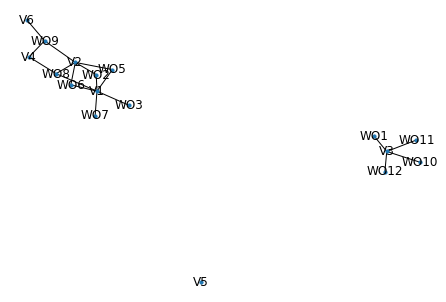

In [600]:
# Draw Graph with nodes and edges with coordinates
G=nx.Graph()
for i,j in vacant_spaces.items():
    G.add_node(i)
G.add_edges_from(nearby_waste100)
nx.draw(G, with_labels=True, node_size=10)

# Create a dictionary with vacant spaces and waste outputs them
new_waste_dict = create_edge_dict(G)
waste_dict = {}
for i,k in new_waste_dict.items():
    new_list = []
    if i in vacant_spaces:
        waste_dict[i]=k
        
#List of dictionaries we will use:
# print(v_potential)
# print(waste_dict)
# print(uf_systems)

# add needed inputs for each potential system into the v_potential dictionary
v_potential_dict={}
for i,k in v_potential.items():
    v_potential_dict[i]={}
    potential_systems = v_potential[i]["UF"]
    for item in potential_systems:
       v_potential_dict[i][item] = uf_systems[item]["in"]
       
# print(v_potential_dict)    
#Design Rule 1.0 : Waste Availability
    #if there are more than 2 found items assign that system to that vacant space

Design Rule 3.0 : Sharing Existing Resources
    

Prepare Data

In [601]:
# Preparation of Data
#Make a dictionary of found items nearby for each potential uf system
found_dict={}

for i,k in v_potential_dict.items():
    found_dict[i]={}
    for system,demanded in k.items():
        found_dict[i][system]={}
        found_dict[i][system]["found"]={}
        found_dict[i][system]["source"]={}
        found=[]
        source=[]
        for waste in waste_dict[i]:
            for each in demanded: 
                available = wastes[waste]["type"]
                source2 = wastes[waste]["tag"]
                source_size = wastes[waste]["size"]
                if each == available:
                    found.append(available)
                    source.append(source2)
                    found_dict[i][system]["found"]=found
                    found_dict[i][system]["source"]=source

#Make a dictionary of missing for each potential uf system           
for i,system in found_dict.items():
    for uf in system:
        missing=[]
        found_dict[i][uf]["missing"]={}
        for x,y in uf_systems.items():
            for item in uf_systems[x]["in"]:
                if uf == x:
                    missing.append(item)
                    found_dict[i][uf]["missing"]=missing
        
#In the dictionary missing items also contain found items
for i,k in found_dict.items():
    for system in k:
        for item in (found_dict[i][system]["found"]):
            if item in found_dict[i][system]["missing"]:
                missing_list=found_dict[i][system]["missing"]
                missing_list.remove(item)

#reach sizes of duplicate items
for i,k in found_dict.items():
    for system in k:
        found_items=found_dict[i][system]["found"]

#Make a dictionary holding each vacant space& found and repeating waste type & waste sources corresponding to found items
duplicate_items={}
for space,potential in found_dict.items():
    duplicate_items[space]={}
    for system, k in potential.items():
        if len(found_dict[space][system]["found"])> 1:
            found_items3=found_dict[space][system]["found"]
            sources=[]
            for index,items in enumerate(found_items3):
                duplicate_items[space][items]={}
                count=found_items3.count(items)
                if count>1:
                    items_str=str(items)
                    sources.append(found_dict[space][system]["source"][index])
                    duplicate_items[space][items]["matching sources"]=sources

# check if the total size of found waste matches the vacant space size

satisfying_duplicate={}

for space, k in duplicate_items.items():
    satisfying_duplicate[space]={}
    for key,value in k.items():
        satisfying_duplicate[space][key]={}
        waste_matched=[]
        not_matched=[]
        if duplicate_items[space][key]!=[]:
            for m,n in duplicate_items[space][key].items():
                matched=duplicate_items[space][key][m]
                for items in matched:
                    found_new=[]
                    waste_matched.append(wastes[items]["size"])
                    if sum(waste_matched)==vacant_spaces[space]["size"]:
                        # print(space, waste_matched, "add to found list and remove from missing")
                        found_new=matched
                        # print(found_new, "is found")
                    else:
                        # print(sum(waste_matched),"And",vacant_spaces[space]["size"],items)
                        not_matched=items
                        # print(not_matched,"is not matched")
                satisfying_duplicate[space][key]=found_new
                            
print(satisfying_duplicate) 

#remove duplicate items if they are also in satisfying_duplicate items list
for space,potential in found_dict.items():
    for system in potential.keys():
        for key, value in satisfying_duplicate.items():
            for waste in value.keys():
                if key==space:
                        if len(found_dict[space][system]["found"])>0:
                            if len(satisfying_duplicate[key][waste])>0:
                                if waste in found_dict[space][system]["found"]:
                                    type(satisfying_duplicate[key][waste])
                                    found_items = found_dict[space][system]["found"]
                                    duplicate=list_duplicates(found_items)
                                    for found in found_items:
                                        if found in duplicate:
                                            found_items.remove(found)                                                
print(found_dict)
#remove duplicate items if they are not in satisfying_duplicate items list

for space in found_dict.keys():
    for system in found_dict[space].keys():
        found_items = found_dict[space][system]["found"]
        missing_items = found_dict[space][system]["missing"]
        duplicate=list_duplicates(found_items)
        for key, value in satisfying_duplicate.items():
            for waste in value.keys():
                if key==space:
                    for found in found_items:
                        if found in duplicate:
                            print("duplicate",space,found,system)
                            if satisfying_duplicate[space][found]==[]:
                                print("duplicate not satisfying",space,found,system)
                                missing_items.append(found)
                                found_items.remove(found) 

#put not satisfying waste sources in a list
not_enough_waste=[]
for space in found_dict:
    for system in found_dict[space]:
        source=found_dict[space][system]["source"]
        for index in range(len(source)):
            item=source[index]
            waste=wastes[item]["type"]
            if waste in found_dict[space][system]["found"]:
                print("found")
            else:
                not_enough_waste.append(item) 

#remove the items in that list from found dict sources
for space in found_dict:
    for system in found_dict[space]:    
        source=found_dict[space][system]["source"]
        for item in not_enough_waste:
            if item in source:
                source.remove(item)                    #  
            


{'V1': {'W6': [], 'W2': {}, 'W5': {}}, 'V4': {'W7': []}, 'V5': {}, 'V6': {}}
{'V1': {'UF3': {'found': ['W6', 'W6', 'W2', 'W6'], 'source': ['WO5', 'WO6', 'WO3', 'WO2'], 'missing': ['W3', 'W4']}, 'UF8': {'found': ['W6', 'W6', 'W5', 'W6'], 'source': ['WO5', 'WO6', 'WO7', 'WO2'], 'missing': []}}, 'V4': {'UF4': {'found': ['W7', 'W7'], 'source': ['WO8', 'WO9'], 'missing': ['W5', 'W6']}, 'UF5': {'found': ['W7', 'W7'], 'source': ['WO8', 'WO9'], 'missing': ['W5', 'W6']}, 'UF9': {'found': ['W7', 'W7'], 'source': ['WO8', 'WO9'], 'missing': ['W5', 'W6']}}, 'V5': {'UF4': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7']}, 'UF5': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7']}, 'UF9': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7']}}, 'V6': {'UF3': {'found': {}, 'source': {}, 'missing': ['W2', 'W3', 'W4', 'W6']}}}
duplicate V1 W6 UF3
duplicate not satisfying V1 W6 UF3
duplicate V1 W6 UF3
duplicate not satisfying V1 W6 UF3
duplicate V1 W6 UF3
duplicate not satisfying V1 W

In [602]:
#remove duplicate items in missing list
print(found_dict)
for space in found_dict.keys():
    for system in found_dict[space].keys():
        missing_items2=found_dict[space][system]["missing"]
        print(system,"missing items2 is", missing_items2)
        duplicate=list_duplicates(missing_items2)
        print("duplicate is",duplicate)
        for missing in missing_items2:
            if missing in duplicate:
                missing_items2.remove(missing) 
                print(duplicate)
                # duplicate.remove(missing)
                print(missing,"is removed")
                print(duplicate)
   
print(found_dict)

{'V1': {'UF3': {'found': ['W2'], 'source': ['WO3'], 'missing': ['W3', 'W4', 'W6', 'W6', 'W6']}, 'UF8': {'found': ['W5'], 'source': ['WO7'], 'missing': ['W6', 'W6', 'W6']}}, 'V4': {'UF4': {'found': ['W7'], 'source': ['WO8', 'WO9'], 'missing': ['W5', 'W6', 'W7']}, 'UF5': {'found': ['W7'], 'source': ['WO8', 'WO9'], 'missing': ['W5', 'W6', 'W7']}, 'UF9': {'found': ['W7'], 'source': ['WO8', 'WO9'], 'missing': ['W5', 'W6', 'W7']}}, 'V5': {'UF4': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7']}, 'UF5': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7']}, 'UF9': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7']}}, 'V6': {'UF3': {'found': {}, 'source': {}, 'missing': ['W2', 'W3', 'W4', 'W6']}}}
UF3 missing items2 is ['W3', 'W4', 'W6', 'W6', 'W6']
duplicate is ['W6']
['W6']
W6 is removed
['W6']
['W6']
W6 is removed
['W6']
UF8 missing items2 is ['W6', 'W6', 'W6']
duplicate is ['W6']
['W6']
W6 is removed
['W6']
['W6']
W6 is removed
['W6']
UF4 missing items2 is ['W5', 'W6',

In [603]:
#add circularity percentage to found_dict
for space in found_dict:
    for system in found_dict[space]:
        found_dict[space][system]["circularity"]=[]
        found=len(found_dict[space][system]["found"])
        missing=len(found_dict[space][system]["missing"])
        total=found+missing
        found_dict[space][system]["circularity"]=found/total
print(found_dict)   

#make a duplicate of found dict, sort system based on circularities
sorted_dict={}
for space in found_dict:
    system=sorted(found_dict[space], key=lambda x: (found_dict[space][x]['circularity']), reverse=True)  
    sorted_dict[space]={} 
    for item in system:
        values={}
        values=(found_dict[space][item])
        sorted_dict[space][item]=values

print(sorted_dict)

{'V1': {'UF3': {'found': ['W2'], 'source': ['WO3'], 'missing': ['W3', 'W4', 'W6'], 'circularity': 0.25}, 'UF8': {'found': ['W5'], 'source': ['WO7'], 'missing': ['W6'], 'circularity': 0.5}}, 'V4': {'UF4': {'found': ['W7'], 'source': ['WO8', 'WO9'], 'missing': ['W5', 'W6', 'W7'], 'circularity': 0.25}, 'UF5': {'found': ['W7'], 'source': ['WO8', 'WO9'], 'missing': ['W5', 'W6', 'W7'], 'circularity': 0.25}, 'UF9': {'found': ['W7'], 'source': ['WO8', 'WO9'], 'missing': ['W5', 'W6', 'W7'], 'circularity': 0.25}}, 'V5': {'UF4': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7'], 'circularity': 0.0}, 'UF5': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7'], 'circularity': 0.0}, 'UF9': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7'], 'circularity': 0.0}}, 'V6': {'UF3': {'found': {}, 'source': {}, 'missing': ['W2', 'W3', 'W4', 'W6'], 'circularity': 0.0}}}
{'V1': {'UF8': {'found': ['W5'], 'source': ['WO7'], 'missing': ['W6'], 'circularity': 0.5}, 'UF3': {'found': ['W2'], 'so

Assign Food Production System To Vacant Space

In [604]:
#check if the criteria is satisfied
occupied={}
used_waste=[]
used_waste_source=[]
used_waste_source_temp=[]
new_edges=[]
occupied_dict={}

for space in sorted_dict:
    print("looking for", space)
    print("for",space,sorted_dict[space],"is possible")
    occupied_dict[space]={}
    occupied_dict[space]["system"]={}
    occupied_dict[space]["found"]={}
    occupied_dict[space]["source"]={}
    occupied_dict[space]["missing"]={}
    for index,system in enumerate(sorted_dict[space]):
        print("looking for system", system)
        occupied[space]={}
        occupied[space]["system"]={}
        found_list=sorted_dict[space][system]["found"]
        sources_list=sorted_dict[space][system]["source"]
        missing_list=sorted_dict[space][system]["missing"]
        print(len(missing_list),"is length for",space,system)

        if len(occupied[space]["system"])==0:
            print(space,"is not occupied run for",system)
            if len(missing_list)==0:    
                for source in sources_list:
                    if source in used_waste_source:
                        print(used_waste_source,"is used",space,system)
                        pass
                    elif source not in used_waste_source:
                        print(used_waste_source,"is used",space,system)
                        occupied[space]["system"]=system
                        occupied_dict[space]["system"]=system
                        occupied_dict[space]["found"]=sorted_dict[space][system]["found"]
                        occupied_dict[space]["source"]=sorted_dict[space][system]["source"]
                        for items in found_list:
                            used_waste.append(items)
                        used_waste_source.append(source)
                        edge_tuple=(source,space)
                        new_edges.append(edge_tuple)
                        print("no missing items:", space, system, "assign")
                if len(occupied[space]["system"])>0:
                    print(space,system,"will break")        
                    break
        
        if len(occupied[space]["system"])==0:
            if len(missing_list)==1:
                print("one item",system,space)
                for missing in missing_list:
                    if missing in non_critical_items:
                        for source in sources_list:
                            if source not in used_waste_source:
                                print("Used Non Critical Source",source)
                                occupied[space]["system"]=system
                                occupied_dict[space]["system"]=system
                                occupied_dict[space]["found"]=sorted_dict[space][system]["found"]
                                occupied_dict[space]["source"]=sorted_dict[space][system]["source"]
                                occupied_dict[space]["missing"]=sorted_dict[space][system]["missing"]
                                for items in found_list:
                                    used_waste.append(items)
                                used_waste_source.append(source)
                                edge_tuple=(source,space)
                                new_edges.append(edge_tuple)
                                print("one non critical missing items:", space, system, "assign")
                    else:
                        print(space,"critical item missing:",missing,"for",system)
                if len(occupied[space]["system"])>0:
                    print(space,system,"will break")        
                    break

        if occupied[space]["system"]==0 :  
            if len(missing_list)==2:
                for missing in missing_list:
                    if missing in non_critical_items:
                        for source in sources_list:
                            if source not in used_waste_source:
                                print("Used Non Critical Source",source)
                                occupied[space]["system"]=system
                                occupied_dict[space]["system"]=system
                                occupied_dict[space]["found"]=sorted_dict[space][system]["found"]
                                occupied_dict[space]["source"]=sorted_dict[space][system]["source"]
                                occupied_dict[space]["missing"]=sorted_dict[space][system]["missing"]
                                for items in found_list:
                                    used_waste.append(items)
                                print("two non critical missing items:", space, system)
                                used_waste_source.append(source)
                                edge_tuple=(source,space)
                                new_edges.append(edge_tuple)
                    else:
                        print(space,"critical item missing:",missing,"for",system)
                if len(occupied[space]["system"])>0:
                    print(space,system,"will break")        
                    break  

looking for V1
for V1 {'UF8': {'found': ['W5'], 'source': ['WO7'], 'missing': ['W6'], 'circularity': 0.5}, 'UF3': {'found': ['W2'], 'source': ['WO3'], 'missing': ['W3', 'W4', 'W6'], 'circularity': 0.25}} is possible
looking for system UF8
1 is length for V1 UF8
V1 is not occupied run for UF8
one item UF8 V1
Used Non Critical Source WO7
one non critical missing items: V1 UF8 assign
V1 UF8 will break
looking for V4
for V4 {'UF4': {'found': ['W7'], 'source': ['WO8', 'WO9'], 'missing': ['W5', 'W6', 'W7'], 'circularity': 0.25}, 'UF5': {'found': ['W7'], 'source': ['WO8', 'WO9'], 'missing': ['W5', 'W6', 'W7'], 'circularity': 0.25}, 'UF9': {'found': ['W7'], 'source': ['WO8', 'WO9'], 'missing': ['W5', 'W6', 'W7'], 'circularity': 0.25}} is possible
looking for system UF4
3 is length for V4 UF4
V4 is not occupied run for UF4
looking for system UF5
3 is length for V4 UF5
V4 is not occupied run for UF5
looking for system UF9
3 is length for V4 UF9
V4 is not occupied run for UF9
looking for V5
for V

Create New List To Be Used In Next Steps

In [605]:
print(occupied)  
print(used_waste_source) 
print(new_edges)
print(occupied_dict)
#add circularity & outputs to occupied_dict
for space in occupied_dict:
    occupied_dict[space]["circularity"]={}
    occupied_dict[space]["outputs"]={}
    occupied_dict[space]["supplements"]={}
    if len(occupied_dict[space]["system"])!=0:
        system=occupied_dict[space]["system"]
        outputs=(uf_systems[system]["out"])
        supplements=uf_systems[system]["supplement"]
        occupied_dict[space]["circularity"]=found_dict[space][system]["circularity"]
        occupied_dict[space]["supplements"]=supplements
        occupied_dict[space]["outputs"]=outputs

#remove empty spaces from occupied_dict
remove=[]
for space in occupied_dict:
    if len(occupied_dict[space]["system"])==0:
        remove.append(space)
for items in remove:
    occupied_dict.pop(items)
print("occupied",occupied_dict)

#remove assigned spaces from found_dict
remove2=[]
for space in sorted_dict:
    if space in occupied_dict:
        remove2.append(space)
for items in remove2:
    sorted_dict.pop(items)
print("non occupied",sorted_dict)

{'V1': {'system': 'UF8'}, 'V4': {'system': {}}, 'V5': {'system': {}}, 'V6': {'system': {}}}
['WO7']
[('WO7', 'V1')]
{'V1': {'system': 'UF8', 'found': ['W5'], 'source': ['WO7'], 'missing': ['W6']}, 'V4': {'system': {}, 'found': {}, 'source': {}, 'missing': {}}, 'V5': {'system': {}, 'found': {}, 'source': {}, 'missing': {}}, 'V6': {'system': {}, 'found': {}, 'source': {}, 'missing': {}}}
occupied {'V1': {'system': 'UF8', 'found': ['W5'], 'source': ['WO7'], 'missing': ['W6'], 'circularity': 0.5, 'outputs': ['O1', 'W1', 'W7'], 'supplements': ['S2']}}
non occupied {'V4': {'UF4': {'found': ['W7'], 'source': ['WO8', 'WO9'], 'missing': ['W5', 'W6', 'W7'], 'circularity': 0.25}, 'UF5': {'found': ['W7'], 'source': ['WO8', 'WO9'], 'missing': ['W5', 'W6', 'W7'], 'circularity': 0.25}, 'UF9': {'found': ['W7'], 'source': ['WO8', 'WO9'], 'missing': ['W5', 'W6', 'W7'], 'circularity': 0.25}}, 'V5': {'UF4': {'found': {}, 'source': {}, 'missing': ['W5', 'W6', 'W7'], 'circularity': 0.0}, 'UF5': {'found': {}

6. Assign Food Producing Supplementary Systems

Prepare Data

In [606]:
#look for a system that can supply needed supplement
#put the findings in a dictionary
v_supplement_fs={}
for space in occupied_dict:
    v_supplement_fs[space]={}
    v_supplement_fs[space]["supplement"]={}
    v_supplement_fs[space]["fs_system"]={}
    v_supplement_fs[space]["supplement"]={}
    v_supplement_fs[space]["supplement source"]={}
    v_supplement_fs[space]["fs_demand"]={}
    v_supplement_fs[space]["fs_demand source"]={}
    v_supplement_fs[space]["potential source"]={}
    print(space)
    supplement=occupied_dict[space]["supplements"]
    print(supplement)
    if supplement!=None:
        for item in supplement:
            if item=="S2":
                for i in uf_systems:
                    out=uf_systems[i]["out"]
                    for input in uf_systems[i]["in"]:
                        if "S2" in out:
                            print("maybe",space, i)
                            v_supplement_fs[space]["fs_system"]=i
                            v_supplement_fs[space]["supplement"]=item
                            v_supplement_fs[space]["fs_demand"]=input
    else:
        v_supplement_fs[space]["fs_system"]=None
print(v_supplement_fs)

#created a dictionary for spaces which need supplement to store system, supplementing neighbor and supplement type
#for each space found what kind of system and supplement and input is necessary 

#look neighbors of supplement needing space to see if there is a potential neighbor
for space in v_supplement_fs:
    potential=[]
    for space2,neighbor in nearby_space:
        if space==space2:
            if len(v_supplement_fs[space]["supplement source"])==0:
                # print(neighbor,"is available")
                system=v_supplement_fs[space]["fs_system"]
                if (vacant_spaces[space]["size"]==vacant_spaces[neighbor]["size"]) and (vacant_spaces[neighbor]["structure"]>=uf_systems[system]["weight"]) and (vacant_spaces[neighbor]["solar"]>=uf_systems[system]["solar"]):
                    potential.append(neighbor)
                    # print(space,potential)
                    v_supplement_fs[space]["potential source"]=potential
# print(v_supplement_fs)

#check if potential sources have fs_demand
for space in v_supplement_fs:
    potential=v_supplement_fs[space]["potential source"]
    if len(v_supplement_fs[space]["supplement source"])==0:
        # print(vacant,len(v_supplement_fs[space]["supplement source"]),"---",v_supplement_fs[space]["supplement source"])
        for vacant in potential:
            nearby_list=waste_dict[vacant]
            for nearby in nearby_list:
                print(vacant, nearby,"is",wastes[nearby]["type"])
                if nearby not in used_waste_source:
                    if wastes[nearby]["size"]==vacant_spaces[space]["size"]:
                        print(nearby,"not used")
                        if v_supplement_fs[space]["fs_demand"]==wastes[nearby]["type"]:
                            print("for",space,vacant,"is potential and has",nearby,"as a source of",wastes[nearby]["type"])
                            v_supplement_fs[space]["supplement source"]=vacant
                            print(v_supplement_fs[space]["supplement source"])
                            v_supplement_fs[space]["fs_demand source"]=nearby
                            print(v_supplement_fs[space]["fs_demand source"])
                            used_waste_source.append(nearby)
                            edge_tuple1=(nearby,vacant)
                            edge_tuple2=(vacant,space)
                            new_edges.append(edge_tuple1)
                            new_edges.append(edge_tuple2)
                            if len(v_supplement_fs[space]["supplement source"])>0:
                                # print(space,system,"will break")        
                                break

            if len(v_supplement_fs[space]["supplement source"])>0:
                            # print(space,system,"will break2")        
                            break
                    
# print(v_supplement_fs)  
# print(used_waste_source) 
# print(new_edges)     
print("occupied",occupied_dict)

for space in v_supplement_fs:
    if len(v_supplement_fs[space]["fs_system"])!=0:
        if len(v_supplement_fs[space]["supplement source"])!=0:
            occ=v_supplement_fs[space]["supplement source"]
            occupied_dict[occ]={}
            occupied_dict[occ]["found"]=v_supplement_fs[space]["fs_demand"]
            occupied_dict[occ]["system"]=v_supplement_fs[space]["fs_system"]
            system=occupied_dict[occ]["system"]
            occupied_dict[occ]["source"]=v_supplement_fs[space]["fs_demand source"]
            occupied_dict[occ]["supplements"]=uf_systems[system]["supplement"]
print(occupied_dict)

#make a dictionary of source: waste type: size: receiver:tuple
network_dict={}
for source,space in new_edges:
    type_list=[]
    network_dict[source]={}
    network_dict[source]["type"]={}
    network_dict[source]["size"]={}
    network_dict[source]["receiver"]={}

for source,space in new_edges:
    network_dict[source]["receiver"]=space
    if source in wastes:
        network_dict[source]["type"]=wastes[source]["type"]
        network_dict[source]["size"]=wastes[source]["size"]
    elif source in vacant_spaces:
        network_dict[source]["size"]=vacant_spaces[source]["size"]
        network_dict[source]["type"]=occupied_dict[source]["found"]
    
print(network_dict)
print(occupied_dict)
for space in v_supplement_fs:
    if len(v_supplement_fs[space]["fs_system"])!=0:
        print("work")
        if len(v_supplement_fs[space]["supplement source"])!=0:
            occ=v_supplement_fs[space]["supplement source"]
            occupied_dict[occ]={}
            print(occupied_dict)
            occupied_dict[occ]["found"]=v_supplement_fs[space]["fs_demand"]
            occupied_dict[occ]["system"]=v_supplement_fs[space]["fs_system"]
            occupied_dict[occ]["source"]=v_supplement_fs[space]["fs_demand source"]
print(occupied_dict)

#make a dictionary of source: waste type: size: receiver:tuple
network_dict={}
for source,space in new_edges:
    type_list=[]
    network_dict[source]={}
    network_dict[source]["type"]={}
    network_dict[source]["size"]={}
    network_dict[source]["receiver"]={}

for source,space in new_edges:
    network_dict[source]["receiver"]=space
    if source in wastes:
        network_dict[source]["type"]=wastes[source]["type"]
        network_dict[source]["size"]=wastes[source]["size"]
    elif source in vacant_spaces:
        network_dict[source]["size"]=vacant_spaces[source]["size"]
        network_dict[source]["type"]=occupied_dict[source]["found"]

print(network_dict)
#now we have food supplying supplementary systems
#we still need to check if these systems need supplements
for space in occupied_dict: 
    system=occupied_dict[space]["system"]
    # print(system)
    # print(uf_systems[system]["supplement"])
    value=uf_systems[system]["supplement"]
    for supplement in value:
        if supplement=="S5":
            v_supplement_fs[space]={}
            v_supplement_fs[space]["supplement"]=supplement
            for uf in uf_systems:
                for out in uf_systems[uf]["out"]:
                    if supplement == out:
                        v_supplement_fs[space]["fs_system"]=uf
                        v_supplement_fs[space]["fs_demand"]=uf_systems[uf]["in"]
            v_supplement_fs[space]["supplement source"]={}
            v_supplement_fs[space]["fs_demand source"]={}
            v_supplement_fs[space]["potential source"]={}
print(v_supplement_fs)

#make a potential list
for space in v_supplement_fs:
    potential=[]
    for space2,neighbor in nearby_space:
        if space==space2:
            if len(v_supplement_fs[space]["supplement source"])==0:
                print(neighbor,"is available")
                system=v_supplement_fs[space]["fs_system"]
                if (vacant_spaces[space]["size"]==vacant_spaces[neighbor]["size"]) and (vacant_spaces[neighbor]["structure"]>=uf_systems[system]["weight"]) and (vacant_spaces[neighbor]["solar"]>=uf_systems[system]["solar"]):
                    potential.append(neighbor)
                    print(space,potential)
                    v_supplement_fs[space]["potential source"]=potential
print(v_supplement_fs)
#check if potential sources have fs_demand
print(used_waste_source)
for space in v_supplement_fs:
    potential=v_supplement_fs[space]["potential source"]
    if len(v_supplement_fs[space]["supplement source"])==0:
        for vacant in potential:
            found=[]
            found_source=[]
            nearby_list=waste_dict[vacant]
            for nearby in nearby_list:
                print(vacant, nearby,"is",wastes[nearby]["type"])
                if nearby not in used_waste_source:
                    if wastes[nearby]["size"]==vacant_spaces[space]["size"]:
                        print(nearby,"not used")
                        found.append(wastes[nearby]["type"])
                        found_source.append(nearby)
                        print(found)
                        if v_supplement_fs[space]["fs_demand"]==found:
                            print("for",space,vacant,"is potential and has",nearby,"as a source of",wastes[nearby]["type"])
                            v_supplement_fs[space]["supplement source"]=vacant
                            print(v_supplement_fs[space]["supplement source"])
                            v_supplement_fs[space]["fs_demand source"]=found_source
                            print(v_supplement_fs[space]["fs_demand source"])
                            for x in found_source:
                                used_waste_source.append(x)
                                edge_tuple1=(x,vacant)
                                new_edges.append(edge_tuple1)
                            edge_tuple2=(vacant,space)
                            
                            new_edges.append(edge_tuple2)
                            if len(v_supplement_fs[space]["supplement source"])>0:
                                # print(space,system,"will break")        
                                break

            if len(v_supplement_fs[space]["supplement source"])>0:
                            # print(space,system,"will break2")        
                            break
                    
print(v_supplement_fs) 
# print(new_edges)
# print(used_waste_source)

V1
['S2']
maybe V1 UF2
{'V1': {'supplement': 'S2', 'fs_system': 'UF2', 'supplement source': {}, 'fs_demand': 'W7', 'fs_demand source': {}, 'potential source': {}}}
V2 WO5 is W6
WO5 not used
V2 WO6 is W6
WO6 not used
V2 WO8 is W7
WO8 not used
for V1 V2 is potential and has WO8 as a source of W7
V2
WO8
occupied {'V1': {'system': 'UF8', 'found': ['W5'], 'source': ['WO7'], 'missing': ['W6'], 'circularity': 0.5, 'outputs': ['O1', 'W1', 'W7'], 'supplements': ['S2']}}
{'V1': {'system': 'UF8', 'found': ['W5'], 'source': ['WO7'], 'missing': ['W6'], 'circularity': 0.5, 'outputs': ['O1', 'W1', 'W7'], 'supplements': ['S2']}, 'V2': {'found': 'W7', 'system': 'UF2', 'source': 'WO8', 'supplements': ['S5']}}
{'WO7': {'type': 'W5', 'size': 1, 'receiver': 'V1'}, 'WO8': {'type': 'W7', 'size': 1, 'receiver': 'V2'}, 'V2': {'type': 'W7', 'size': 1, 'receiver': 'V1'}}
{'V1': {'system': 'UF8', 'found': ['W5'], 'source': ['WO7'], 'missing': ['W6'], 'circularity': 0.5, 'outputs': ['O1', 'W1', 'W7'], 'supplements

In [607]:
combined_dict=vacant_spaces.copy()
combined_dict.update(wastes)

coordinates=[]
#make a coordinate list for new_edges [(coordinates1,coordinates2),(coordinates1,coordinates2),(coordinates1,coordinates2)]
for item in new_edges:
        coordinate_tuple=(combined_dict[item[0]]["location"],combined_dict[item[1]]["location"])
        # print(coordinate_tuple)
        coordinates.append(coordinate_tuple)

print(coordinates)
print(occupied_dict)
for space in v_supplement_fs:
    if len(v_supplement_fs[space]["fs_system"])!=0:
        if len(v_supplement_fs[space]["supplement source"])!=0:
            occ=v_supplement_fs[space]["supplement source"]
            occupied_dict[occ]={}
            occupied_dict[occ]["found"]=v_supplement_fs[space]["fs_demand"]
            occupied_dict[occ]["system"]=v_supplement_fs[space]["fs_system"]
            system=v_supplement_fs[space]["fs_system"]
            print(occ,system)
            print(len(uf_systems[system]))
            print(len(occupied_dict[occ]["found"]))
            occupied_dict[occ]["source"]=v_supplement_fs[space]["fs_demand source"]
            occupied_dict[occ]["outputs"]=v_supplement_fs[space]["supplement"]
            occupied_dict[occ]["supplements"]=uf_systems[system]["supplement"]
            occupied_dict[occ]["circularity"]=1.0
print(occupied_dict)



#make a dictionary of source: waste type: size: receiver:tuple
network_dict={}
for source,space in new_edges:
    type_list=[]
    network_dict[source]={}
    network_dict[source]["type"]={}
    network_dict[source]["size"]={}
    network_dict[source]["receiver"]={}

for source,space in new_edges:
    network_dict[source]["receiver"]=space
    if source in wastes:
        network_dict[source]["type"]=wastes[source]["type"]
        network_dict[source]["size"]=wastes[source]["size"]
    elif source in vacant_spaces:
        network_dict[source]["size"]=vacant_spaces[source]["size"]
        network_dict[source]["type"]=occupied_dict[source]["outputs"]
    
print(network_dict)
print(occupied_dict)

[((2, 4), (0, 1)), ((10, 3), (10, 2)), ((10, 2), (0, 1))]
{'V1': {'system': 'UF8', 'found': ['W5'], 'source': ['WO7'], 'missing': ['W6'], 'circularity': 0.5, 'outputs': ['O1', 'W1', 'W7'], 'supplements': ['S2']}, 'V2': {'found': 'W7', 'system': 'UF2', 'source': 'WO8'}}
V2 UF2
7
2
{'V1': {'system': 'UF8', 'found': ['W5'], 'source': ['WO7'], 'missing': ['W6'], 'circularity': 0.5, 'outputs': ['O1', 'W1', 'W7'], 'supplements': ['S2']}, 'V2': {'found': 'W7', 'system': 'UF2', 'source': 'WO8', 'outputs': 'S2', 'supplements': ['S5'], 'circularity': 1.0}}
{'WO7': {'type': 'W5', 'size': 1, 'receiver': 'V1'}, 'WO8': {'type': 'W7', 'size': 1, 'receiver': 'V2'}, 'V2': {'type': 'S2', 'size': 1, 'receiver': 'V1'}}
{'V1': {'system': 'UF8', 'found': ['W5'], 'source': ['WO7'], 'missing': ['W6'], 'circularity': 0.5, 'outputs': ['O1', 'W1', 'W7'], 'supplements': ['S2']}, 'V2': {'found': 'W7', 'system': 'UF2', 'source': 'WO8', 'outputs': 'S2', 'supplements': ['S5'], 'circularity': 1.0}}


Increasing Search Radius(nearby_waste200)
#make a dictionary of spaces and potential urban farming systems 


In [608]:
#make a dictionary of spaces and potential urban farming systems
v_potential2={}
vacant_spaces2=[]
for space in v_potential:
    if space not in occupied_dict:
        v_potential2[space]={}
        v_potential2[space]["UF"]={}
        v_potential2[space]["tag"]={}
        vacant_spaces2.append(space)
        v_potential2[space]["tag"]=vacant_spaces[space]["tag"]
        v_potential2[space]["UF"]=v_potential[space]["UF"]
 

#exclude "not-transferable sources" if they arent within building
for couple in nearby_waste200:
    for index,item in enumerate(couple):
        if vacant_spaces[couple[0]]["building"]!=wastes[couple[1]]["source"]:
            if couple in nearby_waste200:  
                nearby_waste200.remove(couple)

#exclude already used waste sources from nearby_waste200 list
for couple in nearby_waste200:
    if couple[1] in used_waste_source:
        nearby_waste200.remove(couple)

#make a dictionary of found, missing items
# Draw Graph with nodes and edges with coordinates
G=nx.Graph()
for i in vacant_spaces2:
    G.add_node(i)
G.add_edges_from(nearby_waste200)
# nx.draw(G, with_labels=True, node_size=10)

# Create a dictionary with vacant spaces and waste outputs them
new_waste_dict2 = create_edge_dict(G)
waste_dict2 = {}
for i,k in new_waste_dict2.items():
    new_list2 = []
    if i in vacant_spaces2:
        waste_dict2[i]=k
        
#List of dictionaries we will use:
# print(v_potential)
# print(waste_dict)
# print(uf_systems)

# add needed inputs for each potential system into the v_potential dictionary
v_potential_dict2={}
for i,k in v_potential2.items():
    v_potential_dict2[i]={}
    potential_systems = v_potential2[i]["UF"]
    for item in potential_systems:
       v_potential_dict2[i][item] = uf_systems[item]["in"]


     
# Preparation of Data
#Make a dictionary of found items nearby for each potential uf system
found_dict2={}

for i,k in v_potential_dict2.items():
    found_dict2[i]={}
    for system,demanded in k.items():
        found_dict2[i][system]={}
        found_dict2[i][system]["found"]={}
        found_dict2[i][system]["source"]={}
        found=[]
        source=[]
        for waste in waste_dict2[i]:
            for each in demanded: 
                available = wastes[waste]["type"]
                source2 = wastes[waste]["tag"]
                source_size = wastes[waste]["size"]
                if each == available:
                    found.append(available)
                    source.append(source2)
                    found_dict2[i][system]["found"]=found
                    found_dict2[i][system]["source"]=source

#Make a dictionary of missing for each potential uf system           
for i,system in found_dict2.items():
    for uf in system:
        missing=[]
        found_dict[i][uf]["missing"]={}
        for x,y in uf_systems.items():
            for item in uf_systems[x]["in"]:
                if uf == x:
                    missing.append(item)
                    found_dict2[i][uf]["missing"]=missing
        
#In the dictionary missing items also contain found items
for i,k in found_dict2.items():
    for system in k:
        for item in (found_dict2[i][system]["found"]):
            if item in found_dict2[i][system]["missing"]:
                missing_list=found_dict2[i][system]["missing"]
                missing_list.remove(item)

#reach sizes of duplicate items
for i,k in found_dict2.items():
    for system in k:
        found_items2=found_dict2[i][system]["found"]

#Make a dictionary holding each vacant space& found and repeating waste type & waste sources corresponding to found items
duplicate_items2={}
for space,potential in found_dict2.items():
    duplicate_items2[space]={}
    for system, k in potential.items():
        if len(found_dict2[space][system]["found"])> 1:
            found_items3=found_dict2[space][system]["found"]
            sources=[]
            for index,items in enumerate(found_items3):
                duplicate_items2[space][items]={}
                count=found_items3.count(items)
                if count>1:
                    items_str=str(items)
                    sources.append(found_dict2[space][system]["source"][index])
                    duplicate_items2[space][items]["matching sources"]=sources

# check if the total size of found waste matches the vacant space size

satisfying_duplicate2={}

for space, k in duplicate_items2.items():
    satisfying_duplicate2[space]={}
    for key,value in k.items():
        satisfying_duplicate2[space][key]={}
        waste_matched=[]
        not_matched=[]
        if duplicate_items2[space][key]!=[]:
            for m,n in duplicate_items2[space][key].items():
                matched=duplicate_items2[space][key][m]
                for items in matched:
                    found_new=[]
                    waste_matched.append(wastes[items]["size"])
                    if sum(waste_matched)==vacant_spaces[space]["size"]:
                        # print(space, waste_matched, "add to found list and remove from missing")
                        found_new=matched
                        # print(found_new, "is found")
                    else:
                        # print(sum(waste_matched),"And",vacant_spaces[space]["size"],items)
                        not_matched=items
                        # print(not_matched,"is not matched")
                satisfying_duplicate2[space][key]=found_new
                            
# print(satisfying_duplicate2) 

#remove duplicate items if they are also in satisfying_duplicate items list
for space,potential in found_dict2.items():
    for system in potential.keys():
        for key, value in satisfying_duplicate2.items():
            for waste in value.keys():
                if key==space:
                        if len(found_dict2[space][system]["found"])>0:
                            if len(satisfying_duplicate2[key][waste])>0:
                                if waste in found_dict2[space][system]["found"]:
                                    type(satisfying_duplicate2[key][waste])
                                    found_items = found_dict2[space][system]["found"]
                                    duplicate=list_duplicates(found_items)
                                    for found in found_items:
                                        if found in duplicate:
                                            found_items.remove(found)                                                
# print(found_dict2)
#remove duplicate items if they are not in satisfying_duplicate items list

for space in found_dict2.keys():
    for system in found_dict2[space].keys():
        found_items = found_dict2[space][system]["found"]
        missing_items = found_dict2[space][system]["missing"]
        duplicate=list_duplicates(found_items)
        for key, value in satisfying_duplicate2.items():
            for waste in value.keys():
                if key==space:
                    for found in found_items:
                        if found in duplicate:
                            # print("duplicate",space,found,system)
                            if satisfying_duplicate2[space][found]==[]:
                                # print("duplicate not satisfying",space,found,system)
                                missing_items.append(found)
                                found_items.remove(found) 
# print(found_dict2)
#put not satisfying waste sources in a list
not_enough_waste=[]
for space in found_dict2:
    for system in found_dict2[space]:
        source=found_dict2[space][system]["source"]
        for index in range(len(source)):
            item=source[index]
            waste=wastes[item]["type"]
            if waste in found_dict2[space][system]["found"]:
                print("found")
            else:
                not_enough_waste.append(item) 

#remove the items in that list from found dict sources
for space in found_dict2:
    for system in found_dict2[space]:    
        source=found_dict2[space][system]["source"]
        for item in not_enough_waste:
            if item in source:
                source.remove(item)                    #  
            
#remove duplicate items in missing list
for space in found_dict2.keys():
    for system in found_dict2[space].keys():
       missing_items2 = found_dict2[space][system]["missing"]   
       duplicate=list_duplicates(missing_items2)
       for missing in missing_items2:
           if missing in duplicate:
               missing_items2.remove(missing) 
               duplicate.remove(missing)
            #    print(missing,"is removed")
            #    print(duplicate)
   
#add circularity percentage to found_dict
for space in found_dict2:
    for system in found_dict2[space]:
        found_dict2[space][system]["circularity"]=[]
        found=len(found_dict2[space][system]["found"])
        missing=len(found_dict2[space][system]["missing"])
        total=found+missing
        found_dict2[space][system]["circularity"]=found/total
# print(found_dict2)   

#make a duplicate of found dict, sort system based on circularities
sorted_dict2={}
for space in found_dict2:
    system=sorted(found_dict2[space], key=lambda x: (found_dict2[space][x]['circularity']), reverse=True)  
    sorted_dict2[space]={} 
    for item in system:
        values={}
        values=(found_dict2[space][item])
        sorted_dict2[space][item]=values

# print(sorted_dict2)

#check if the criteria is satisfied
for space in sorted_dict2:
    # print("looking for", space)
    # print("for",space,sorted_dict2[space],"is possible")
    for index,system in enumerate(sorted_dict2[space]):
        # print("looking for system", system)
        found_list=sorted_dict2[space][system]["found"]
        sources_list=sorted_dict2[space][system]["source"]
        missing_list=sorted_dict2[space][system]["missing"]
        # print(len(missing_list),"is length for",space,system)

        if len(occupied[space]["system"])==0:
            # print(space,"is not occupied run for",system)
            if len(missing_list)==0:    
                for source in sources_list:
                    if source in used_waste_source:
                        # print(used_waste_source,"is used",space,system)
                        pass
                    elif source not in used_waste_source:
                        # print(used_waste_source,"is used",space,system)
                        occupied[space]["system"]=system
                        occupied_dict[space]["system"]=system
                        occupied_dict[space]["found"]=sorted_dict2[space][system]["found"]
                        occupied_dict[space]["source"]=sorted_dict2[space][system]["source"]
                        for items in found_list:
                            used_waste.append(items)
                        used_waste_source.append(source)
                        edge_tuple=(source,space)
                        new_edges.append(edge_tuple)
                        # print("no missing items:", space, system, "assign")
                if len(occupied[space]["system"])>0:
                    print(space,system,"will break")        
                    break
        
        if len(occupied[space]["system"])==0:
            if len(missing_list)==1:
                # print("one item",system,space)
                for missing in missing_list:
                    if missing in non_critical_items:
                        for source in sources_list:
                            if source not in used_waste_source:
                                # print("Used Non Critical Source",source)
                                occupied[space]["system"]=system
                                occupied_dict[space]["system"]=system
                                occupied_dict[space]["found"]=sorted_dict2[space][system]["found"]
                                occupied_dict[space]["source"]=sorted_dict2[space][system]["source"]
                                occupied_dict[space]["missing"]=sorted_dict2[space][system]["missing"]
                                for items in found_list:
                                    used_waste.append(items)
                                used_waste_source.append(source)
                                edge_tuple=(source,space)
                                new_edges.append(edge_tuple)
                                # print("one non critical missing items:", space, system, "assign")
                    else:
                        print(space,"critical item missing:",missing,"for",system)
                if len(occupied[space]["system"])>0:
                    print(space,system,"will break")        
                    break

        if occupied[space]["system"]==0 :  
            if len(missing_list)==2:
                for missing in missing_list:
                    if missing in non_critical_items:
                        # print(space,system,"critical")
                        for source in sources_list:
                            if source not in used_waste_source:
                                # print("Used Non Critical Source",source)
                                occupied[space]["system"]=system
                                occupied_dict[space]["system"]=system
                                occupied_dict[space]["found"]=sorted_dict2[space][system]["found"]
                                occupied_dict[space]["source"]=sorted_dict2[space][system]["source"]
                                occupied_dict[space]["missing"]=sorted_dict2[space][system]["missing"]
                                for items in found_list:
                                    used_waste.append(items)
                                # print("two non critical missing items:", space, system)
                                used_waste_source.append(source)
                                edge_tuple=(source,space)
                                new_edges.append(edge_tuple)
                    else:
                        print(space,"critical item missing:",missing,"for",system)
                if len(occupied[space]["system"])>0:
                    print(space,system,"will break")        
                    break  
# print(occupied_dict)
#add circularity & outputs to occupied_dict
for space in found_dict2:
    if space in occupied_dict:
        occupied_dict[space]["circularity"]={}
        occupied_dict[space]["outputs"]={}
        occupied_dict[space]["supplements"]={}
        if len(occupied_dict[space]["system"])!=0:
            system=occupied_dict[space]["system"]
            outputs=(uf_systems[system]["out"])
            supplements=uf_systems[system]["supplement"]
            occupied_dict[space]["circularity"]=found_dict2[space][system]["circularity"]
            occupied_dict[space]["supplements"]=supplements
            occupied_dict[space]["outputs"]=outputs

print(occupied_dict)


found
found
found
found
found
found
{'V1': {'system': 'UF8', 'found': ['W5'], 'source': ['WO7'], 'missing': ['W6'], 'circularity': 0.5, 'outputs': ['O1', 'W1', 'W7'], 'supplements': ['S2']}, 'V2': {'found': 'W7', 'system': 'UF2', 'source': 'WO8', 'outputs': 'S2', 'supplements': ['S5'], 'circularity': 1.0}}


In [609]:
#remove empty spaces from occupied_dict
remove=[]
for space in occupied_dict:
    if len(occupied_dict[space]["system"])==0:
        remove.append(space)
for items in remove:
    occupied_dict.pop(items)
# print("occupied",occupied_dict)

#remove assigned spaces from found_dict
remove2=[]
for space in sorted_dict2:
    if space in occupied_dict:
        remove2.append(space)
for items in remove2:
    sorted_dict2.pop(items)
# print("non occupied",sorted_dict2)
#look for a system that can supply needed supplement
#put the findings in a dictionary
v_supplement_fs2={}
for space in occupied_dict:
    v_supplement_fs2[space]={}
    v_supplement_fs2[space]["supplement"]={}
    v_supplement_fs2[space]["fs_system"]={}
    v_supplement_fs2[space]["supplement"]={}
    v_supplement_fs2[space]["supplement source"]={}
    v_supplement_fs2[space]["fs_demand"]={}
    v_supplement_fs2[space]["fs_demand source"]={}
    v_supplement_fs2[space]["potential source"]={}
    supplement=occupied_dict[space]["supplements"]
    # print(supplement)
    if supplement!=None:
        for item in supplement:
            if item=="S2":
                for i in uf_systems:
                    out=uf_systems[i]["out"]
                    for input in uf_systems[i]["in"]:
                        if "S2" in out:
                            # print("maybe",space, i)
                            v_supplement_fs2[space]["fs_system"]=i
                            v_supplement_fs2[space]["supplement"]=item
                            v_supplement_fs2[space]["fs_demand"]=input
    else:
        v_supplement_fs2[space]["fs_system"]=None
# print(v_supplement_fs2)


#created a dictionary for spaces which need supplement to store system, supplementing neighbor and supplement type
#for each space found what kind of system and supplement and input is necessary 
# print(vacant_spaces)
# print(v_supplement_fs2)
#look neighbors of supplement needing space to see if there is a potential neighbor
for space in v_supplement_fs2:
    potential=[]
    for space2,neighbor in nearby_space2:
        print(space2,neighbor)
        if space==space2:
            if len(v_supplement_fs2[space]["fs_system"])!=0:
                if len(v_supplement_fs2[space]["supplement source"])==0:
                    print(neighbor,"is available")
                    system=v_supplement_fs2[space]["fs_system"]
                    print(system)
                    if (vacant_spaces[space]["size"]==vacant_spaces[neighbor]["size"]) and (vacant_spaces[neighbor]["structure"]>=uf_systems[system]["weight"]) and (vacant_spaces[neighbor]["solar"]>=uf_systems[system]["solar"]):
                        potential.append(neighbor)
                        # print(space,potential)
                        v_supplement_fs2[space]["potential source"]=potential
# print(v_supplement_fs2)

#check if potential sources have fs_demand
for space in v_supplement_fs2:
    potential=v_supplement_fs2[space]["potential source"]
    if len(v_supplement_fs2[space]["supplement source"])==0:
        # print(vacant,len(v_supplement_fs[space]["supplement source"]),"---",v_supplement_fs[space]["supplement source"])
        for vacant in potential:
            nearby_list=waste_dict[vacant]
            for nearby in nearby_list:
                # print(vacant, nearby,"is",wastes[nearby]["type"])
                if nearby not in used_waste_source:
                    if wastes[nearby]["size"]==vacant_spaces[space]["size"]:
                        # print(nearby,"not used")
                        if v_supplement_fs2[space]["fs_demand"]==wastes[nearby]["type"]:
                            # print("for",space,vacant,"is potential and has",nearby,"as a source of",wastes[nearby]["type"])
                            v_supplement_fs2[space]["supplement source"]=vacant
                            # print(v_supplement_fs[space]["supplement source"])
                            v_supplement_fs2[space]["fs_demand source"]=nearby
                            # print(v_supplement_fs[space]["fs_demand source"])
                            used_waste_source.append(nearby)
                            edge_tuple1=(nearby,vacant)
                            edge_tuple2=(vacant,space)
                            new_edges.append(edge_tuple1)
                            new_edges.append(edge_tuple2)
                            if len(v_supplement_fs2[space]["supplement source"])>0:
                                # print(space,system,"will break")        
                                break

            if len(v_supplement_fs2[space]["supplement source"])>0:
                            # print(space,system,"will break2")        
                            break
# print(v_supplement_fs2)  
                
for space in v_supplement_fs2:
    if len(v_supplement_fs2[space]["fs_system"])!=0:
        if len(v_supplement_fs2[space]["supplement source"])!=0:
            occ=v_supplement_fs2[space]["supplement source"]
            # occupied_dict[occ]={}
            occupied_dict[occ]["found"]=v_supplement_fs2[space]["fs_demand"]
            occupied_dict[occ]["system"]=v_supplement_fs2[space]["fs_system"]
            occupied_dict[occ]["source"]=v_supplement_fs2[space]["fs_demand source"]
print(occupied_dict , "is occupied dict2")


V1 V2
V2 is available
UF2
V1 V3
V3 is available
UF2
V6 V3
V2 V3
V6 V4
V4 V2
V1 V2
V1 V3
V6 V3
V2 V3
V6 V4
V4 V2
{'V1': {'system': 'UF8', 'found': ['W5'], 'source': ['WO7'], 'missing': ['W6'], 'circularity': 0.5, 'outputs': ['O1', 'W1', 'W7'], 'supplements': ['S2']}, 'V2': {'found': 'W7', 'system': 'UF2', 'source': 'WO9', 'outputs': 'S2', 'supplements': ['S5'], 'circularity': 1.0}} is occupied dict2


In [610]:

# print(v_supplement_fs2)
#now we have food supplying supplementary systems
#we still need to check if these systems need supplements
for space in occupied_dict: 
    system=occupied_dict[space]["system"]
    # print(system)
    # print(uf_systems[system]["supplement"])
    value=uf_systems[system]["supplement"]
    for supplement in value:
        if supplement=="S5":
            v_supplement_fs2[space]["supplement"]={}
            v_supplement_fs2[space]["supplement"]=supplement
            for uf in uf_systems:
                for out in uf_systems[uf]["out"]:
                    if supplement == out:
                        print(space,supplement,out,uf)
                        v_supplement_fs2[space]["fs_system"]=uf
                        v_supplement_fs2[space]["fs_demand"]=uf_systems[uf]["in"]

            v_supplement_fs2[space]["supplement source"]={}
            v_supplement_fs2[space]["fs_demand source"]={}
            v_supplement_fs2[space]["potential source"]={}
# print(v_supplement_fs2)


#make a potential list
for space in v_supplement_fs2:
    potential=[]
    for space2,neighbor in nearby_space2:
        if space==space2:
            if len(v_supplement_fs2[space]["supplement source"])==0:
                print(neighbor,"is available")
                if len(v_supplement_fs2[space]["fs_system"])!=0:
                    system=v_supplement_fs2[space]["fs_system"]
                    if (vacant_spaces[space]["size"]==vacant_spaces[neighbor]["size"]) and (vacant_spaces[neighbor]["structure"]>=uf_systems[system]["weight"]) and (vacant_spaces[neighbor]["solar"]>=uf_systems[system]["solar"]):
                        potential.append(neighbor)
                        print(space,potential)
                        v_supplement_fs2[space]["potential source"]=potential
# print(v_supplement_fs2)


#check if potential sources have fs_demand
# print(used_waste_source)
for space in v_supplement_fs2:
    potential=v_supplement_fs2[space]["potential source"]
    if len(v_supplement_fs2[space]["supplement source"])==0:
        for vacant in potential:
            found=[]
            found_matching=[]
            found_source=[]
            nearby_list=waste_dict[vacant]
            for nearby in nearby_list:
                print(vacant, nearby,"is",wastes[nearby]["type"])
                if nearby not in used_waste_source:
                    
                    if wastes[nearby]["size"]==vacant_spaces[space]["size"]:
                        print(nearby,"not used")
                        found.append(wastes[nearby]["type"])
                        found_source.append(nearby)
                        print(found, "is found")
                        if v_supplement_fs2[space]["fs_demand"]==found:
                            found_matching.append(item)
                            print(found_matching,"is matched")
                            print("for",space,vacant,"is potential and has",nearby,"as a source of",wastes[nearby]["type"])
                            v_supplement_fs2[space]["supplement source"]=vacant
                            print(v_supplement_fs2[space]["supplement source"])
                            v_supplement_fs2[space]["fs_demand source"]=found_source
                            print(v_supplement_fs2[space]["fs_demand source"])
                            for x in found_source:
                                used_waste_source.append(x)
                                edge_tuple1=(x,vacant)
                                new_edges.append(edge_tuple1)
                            edge_tuple2=(vacant,space)
                            
                            new_edges.append(edge_tuple2)
                            if len(v_supplement_fs2[space]["supplement source"])>0:
                                # print(space,system,"will break")        
                                break

        if len(v_supplement_fs2[space]["supplement source"])>0:
                        # print(space,system,"will break2")        
                        break
                    
# print(v_supplement_fs2) 
# print(new_edges)
# print(used_waste_source)

#make a dictionary of source: waste type: size: receiver:tuple
network_dict={}
for source,space in new_edges:
    type_list=[]
    network_dict[source]={}
    network_dict[source]["type"]={}
    network_dict[source]["size"]={}
    network_dict[source]["receiver"]={}

for source,space in new_edges:
    network_dict[source]["receiver"]=space
    if source in wastes:
        network_dict[source]["type"]=wastes[source]["type"]
        network_dict[source]["size"]=wastes[source]["size"]
    elif source in vacant_spaces:
        network_dict[source]["size"]=vacant_spaces[source]["size"]
        network_dict[source]["type"]=occupied_dict[source]["found"]
print(occupied_dict) 
print(network_dict)


V2 S5 S5 UF1
V3 is available
V2 ['V3']
V3 WO1 is W1
WO1 not used
['W1'] is found
V3 WO10 is W6
WO10 not used
['W1', 'W6'] is found
V3 WO11 is W3
WO11 not used
['W1', 'W6', 'W3'] is found
V3 WO12 is W6
WO12 not used
['W1', 'W6', 'W3', 'W6'] is found
{'V1': {'system': 'UF8', 'found': ['W5'], 'source': ['WO7'], 'missing': ['W6'], 'circularity': 0.5, 'outputs': ['O1', 'W1', 'W7'], 'supplements': ['S2']}, 'V2': {'found': 'W7', 'system': 'UF2', 'source': 'WO9', 'outputs': 'S2', 'supplements': ['S5'], 'circularity': 1.0}}
{'WO7': {'type': 'W5', 'size': 1, 'receiver': 'V1'}, 'WO8': {'type': 'W7', 'size': 1, 'receiver': 'V2'}, 'V2': {'type': 'W7', 'size': 1, 'receiver': 'V1'}, 'WO9': {'type': 'W7', 'size': 1, 'receiver': 'V2'}}


Increasing Search Radius (waste_nearby300)

In [611]:
#make a dictionary of spaces and potential urban farming systems
v_potential3={}
vacant_spaces3=[]
for space in v_potential:
    if space not in occupied_dict:
        v_potential3[space]={}
        v_potential3[space]["UF"]={}
        v_potential3[space]["tag"]={}
        vacant_spaces3.append(space)
        v_potential3[space]["tag"]=vacant_spaces[space]["tag"]
        v_potential3[space]["UF"]=v_potential[space]["UF"]
 

#exclude "not-transferable sources" if they arent within building
for couple in nearby_waste300:
    for index,item in enumerate(couple):
        if vacant_spaces[couple[0]]["building"]!=wastes[couple[1]]["source"]:
            if couple in nearby_waste300:  
                nearby_waste300.remove(couple)

#exclude already used waste sources from nearby_waste300 list
for couple in nearby_waste300:
    if couple[1] in used_waste_source:
        nearby_waste300.remove(couple)

#make a dictionary of found, missing items
# Draw Graph with nodes and edges with coordinates
G=nx.Graph()
for i in vacant_spaces3:
    G.add_node(i)
G.add_edges_from(nearby_waste300)
# nx.draw(G, with_labels=True, node_size=10)

# Create a dictionary with vacant spaces and waste outputs them
new_waste_dict3 = create_edge_dict(G)
waste_dict3 = {}
for i,k in new_waste_dict3.items():
    new_list2 = []
    if i in vacant_spaces3:
        waste_dict3[i]=k
        
#List of dictionaries we will use:
# print(v_potential)
# print(waste_dict)
# print(uf_systems)

# add needed inputs for each potential system into the v_potential dictionary
v_potential_dict3={}
for i,k in v_potential3.items():
    v_potential_dict3[i]={}
    potential_systems = v_potential3[i]["UF"]
    for item in potential_systems:
       v_potential_dict3[i][item] = uf_systems[item]["in"]


     
# Preparation of Data
#Make a dictionary of found items nearby for each potential uf system
found_dict3={}

for i,k in v_potential_dict3.items():
    found_dict3[i]={}
    for system,demanded in k.items():
        found_dict3[i][system]={}
        found_dict3[i][system]["found"]={}
        found_dict3[i][system]["source"]={}
        found=[]
        source3=[]
        for waste in waste_dict3[i]:
            for each in demanded: 
                available = wastes[waste]["type"]
                source = wastes[waste]["tag"]
                source_size = wastes[waste]["size"]
                if each == available:
                    found.append(available)
                    source3.append(source)
                    found_dict3[i][system]["found"]=found
                    found_dict3[i][system]["source"]=source3


In [612]:

#Make a dictionary of missing for each potential uf system           
for i,system in found_dict3.items():
    for uf in system:
        missing=[]
        found_dict3[i][uf]["missing"]={}
        for x,y in uf_systems.items():
            for item in uf_systems[x]["in"]:
                if uf == x:
                    missing.append(item)
                    found_dict3[i][uf]["missing"]=missing
        
#In the dictionary missing items also contain found items
for i,k in found_dict3.items():
    for system in k:
        for item in (found_dict3[i][system]["found"]):
            if item in found_dict3[i][system]["missing"]:
                missing_list=found_dict3[i][system]["missing"]
                missing_list.remove(item)

#reach sizes of duplicate items
for i,k in found_dict3.items():
    for system in k:
        found_items3=found_dict3[i][system]["found"]

#Make a dictionary holding each vacant space& found and repeating waste type & waste sources corresponding to found items
duplicate_items3={}
for space,potential in found_dict3.items():
    duplicate_items3[space]={}
    for system, k in potential.items():
        if len(found_dict3[space][system]["found"])> 1:
            found_items3=found_dict3[space][system]["found"]
            print(found_items3)
            sources=[]
            for index,items in enumerate(found_items3):
                duplicate_items3[space][items]={}
                count=found_items3.count(items)
                print(count,"is count")
                if count>1:
                    items_str=str(items)
                    print(items_str)
                    print(index)
                    print(space,system,found_dict3[space][system])
                    sources.append(found_dict3[space][system]["source"][index])
                    duplicate_items3[space][items]["matching sources"]=sources


['W6', 'W6', 'W7', 'W6', 'W6']
4 is count
W6
0
V4 UF4 {'found': ['W6', 'W6', 'W7', 'W6', 'W6'], 'source': ['WO5', 'WO6', 'WO8', 'WO10', 'WO12'], 'missing': ['W5']}
4 is count
W6
1
V4 UF4 {'found': ['W6', 'W6', 'W7', 'W6', 'W6'], 'source': ['WO5', 'WO6', 'WO8', 'WO10', 'WO12'], 'missing': ['W5']}
1 is count
4 is count
W6
3
V4 UF4 {'found': ['W6', 'W6', 'W7', 'W6', 'W6'], 'source': ['WO5', 'WO6', 'WO8', 'WO10', 'WO12'], 'missing': ['W5']}
4 is count
W6
4
V4 UF4 {'found': ['W6', 'W6', 'W7', 'W6', 'W6'], 'source': ['WO5', 'WO6', 'WO8', 'WO10', 'WO12'], 'missing': ['W5']}
['W6', 'W6', 'W7', 'W6', 'W6']
4 is count
W6
0
V4 UF5 {'found': ['W6', 'W6', 'W7', 'W6', 'W6'], 'source': ['WO5', 'WO6', 'WO8', 'WO10', 'WO12'], 'missing': ['W5']}
4 is count
W6
1
V4 UF5 {'found': ['W6', 'W6', 'W7', 'W6', 'W6'], 'source': ['WO5', 'WO6', 'WO8', 'WO10', 'WO12'], 'missing': ['W5']}
1 is count
4 is count
W6
3
V4 UF5 {'found': ['W6', 'W6', 'W7', 'W6', 'W6'], 'source': ['WO5', 'WO6', 'WO8', 'WO10', 'WO12'], 'mis

In [613]:

# check if the total size of found waste matches the vacant space size

satisfying_duplicate3={}

for space, k in duplicate_items3.items():
    satisfying_duplicate3[space]={}
    for key,value in k.items():
        satisfying_duplicate3[space][key]={}
        waste_matched=[]
        not_matched=[]
        if duplicate_items3[space][key]!=[]:
            for m,n in duplicate_items3[space][key].items():
                matched=duplicate_items3[space][key][m]
                for items in matched:
                    found_new=[]
                    waste_matched.append(wastes[items]["size"])
                    if sum(waste_matched)==vacant_spaces[space]["size"]:
                        # print(space, waste_matched, "add to found list and remove from missing")
                        found_new=matched
                        # print(found_new, "is found")
                    else:
                        # print(sum(waste_matched),"And",vacant_spaces[space]["size"],items)
                        not_matched=items
                        # print(not_matched,"is not matched")
                satisfying_duplicate3[space][key]=found_new

#remove duplicate items if they are also in satisfying_duplicate items list
for space,potential in found_dict3.items():
    for system in potential.keys():
        for key, value in satisfying_duplicate3.items():
            for waste in value.keys():
                if key==space:
                        if len(found_dict3[space][system]["found"])>0:
                            if len(satisfying_duplicate3[key][waste])>0:
                                if waste in found_dict3[space][system]["found"]:
                                    type(satisfying_duplicate3[key][waste])
                                    found_items = found_dict3[space][system]["found"]
                                    duplicate=list_duplicates(found_items)
                                    for found in found_items:
                                        if found in duplicate:
                                            found_items.remove(found)                                                
# print(found_dict2)
#remove duplicate items if they are not in satisfying_duplicate items list

for space in found_dict3.keys():
    for system in found_dict3[space].keys():
        found_items = found_dict3[space][system]["found"]
        missing_items = found_dict3[space][system]["missing"]
        duplicate=list_duplicates(found_items)
        for key, value in satisfying_duplicate3.items():
            for waste in value.keys():
                if key==space:
                    for found in found_items:
                        if found in duplicate:
                            # print("duplicate",space,found,system)
                            if satisfying_duplicate3[space][found]==[]:
                                # print("duplicate not satisfying",space,found,system)
                                missing_items.append(found)
                                found_items.remove(found) 
# print(found_dict2)
#put not satisfying waste sources in a list
not_enough_waste=[]
for space in found_dict3:
    for system in found_dict3[space]:
        source=found_dict3[space][system]["source"]
        for index in range(len(source)):
            item=source[index]
            waste=wastes[item]["type"]
            if waste in found_dict3[space][system]["found"]:
                print("found")
            else:
                not_enough_waste.append(item) 

#remove the items in that list from found dict sources
for space in found_dict3:
    for system in found_dict3[space]:    
        source=found_dict3[space][system]["source"]
        for item in not_enough_waste:
            if item in source:
                source.remove(item)                    #  
            
#remove duplicate items in missing list
for space in found_dict3.keys():
    for system in found_dict2[space].keys():
       missing_items2 = found_dict3[space][system]["missing"]   
       duplicate=list_duplicates(missing_items2)
       for missing in missing_items2:
           if missing in duplicate:
               missing_items2.remove(missing) 
               duplicate.remove(missing)
   
#add circularity percentage to found_dict
for space in found_dict3:
    for system in found_dict3[space]:
        found_dict3[space][system]["circularity"]=[]
        found=len(found_dict3[space][system]["found"])
        missing=len(found_dict3[space][system]["missing"])
        total=found+missing
        found_dict3[space][system]["circularity"]=found/total
# print(found_dict2)   

#make a duplicate of found dict, sort system based on circularities
sorted_dict3={}
for space in found_dict3:
    system=sorted(found_dict3[space], key=lambda x: (found_dict3[space][x]['circularity']), reverse=True)  
    sorted_dict3[space]={} 
    for item in system:
        values={}
        values=(found_dict3[space][item])
        sorted_dict3[space][item]=values

# print(sorted_dict2)

#check if the criteria is satisfied
for space in sorted_dict3:
    # print("looking for", space)
    # print("for",space,sorted_dict2[space],"is possible")
    for index,system in enumerate(sorted_dict3[space]):
        # print("looking for system", system)
        found_list=sorted_dict3[space][system]["found"]
        sources_list=sorted_dict3[space][system]["source"]
        missing_list=sorted_dict3[space][system]["missing"]
        # print(len(missing_list),"is length for",space,system)

        if len(occupied[space]["system"])==0:
            # print(space,"is not occupied run for",system)
            if len(missing_list)==0:    
                for source in sources_list:
                    if source in used_waste_source:
                        # print(used_waste_source,"is used",space,system)
                        pass
                    elif source not in used_waste_source:
                        # print(used_waste_source,"is used",space,system)
                        occupied[space]["system"]=system
                        occupied_dict[space]["system"]=system
                        occupied_dict[space]["found"]=sorted_dict3[space][system]["found"]
                        occupied_dict[space]["source"]=sorted_dict3[space][system]["source"]
                        for items in found_list:
                            used_waste.append(items)
                        used_waste_source.append(source)
                        edge_tuple=(source,space)
                        new_edges.append(edge_tuple)
                        # print("no missing items:", space, system, "assign")
                if len(occupied[space]["system"])>0:
                    print(space,system,"will break")        
                    break
        
        if len(occupied[space]["system"])==0:
            if len(missing_list)==1:
                # print("one item",system,space)
                for missing in missing_list:
                    if missing in non_critical_items:
                        for source in sources_list:
                            if source not in used_waste_source:
                                # print("Used Non Critical Source",source)
                                occupied[space]["system"]=system
                                occupied_dict[space]["system"]=system
                                occupied_dict[space]["found"]=sorted_dict2[space][system]["found"]
                                occupied_dict[space]["source"]=sorted_dict2[space][system]["source"]
                                occupied_dict[space]["missing"]=sorted_dict2[space][system]["missing"]
                                for items in found_list:
                                    used_waste.append(items)
                                used_waste_source.append(source)
                                edge_tuple=(source,space)
                                new_edges.append(edge_tuple)
                                # print("one non critical missing items:", space, system, "assign")
                    else:
                        print(space,"critical item missing:",missing,"for",system)
                if len(occupied[space]["system"])>0:
                    print(space,system,"will break")        
                    break

        if occupied[space]["system"]==0 :  
            if len(missing_list)==2:
                for missing in missing_list:
                    if missing in non_critical_items:
                        # print(space,system,"critical")
                        for source in sources_list:
                            if source not in used_waste_source:
                                # print("Used Non Critical Source",source)
                                occupied[space]["system"]=system
                                occupied_dict[space]["system"]=system
                                occupied_dict[space]["found"]=sorted_dict2[space][system]["found"]
                                occupied_dict[space]["source"]=sorted_dict2[space][system]["source"]
                                occupied_dict[space]["missing"]=sorted_dict2[space][system]["missing"]
                                for items in found_list:
                                    used_waste.append(items)
                                # print("two non critical missing items:", space, system)
                                used_waste_source.append(source)
                                edge_tuple=(source,space)
                                new_edges.append(edge_tuple)
                    else:
                        print(space,"critical item missing:",missing,"for",system)
                if len(occupied[space]["system"])>0:
                    print(space,system,"will break")        
                    break  
print(found_dict3)
#add circularity & outputs to occupied_dict
for space in found_dict3:
    if space in occupied_dict:
        occupied_dict[space]["circularity"]={}
        occupied_dict[space]["outputs"]={}
        occupied_dict[space]["supplements"]={}
        if len(occupied_dict[space]["system"])!=0:
            system=occupied_dict[space]["system"]
            outputs=(uf_systems[system]["out"])
            # supplements=uf_systems[system]["supplement"]
            occupied_dict[space]["circularity"]=found_dict3[space][system]["circularity"]
            occupied_dict[space]["supplements"]=uf_systems[system]["supplement"]
            occupied_dict[space]["outputs"]=outputs

print(occupied_dict)
#remove empty spaces from occupied_dict
remove=[]
for space in occupied_dict:
    if len(occupied_dict[space]["system"])==0:
        remove.append(space)
for items in remove:
    occupied_dict.pop(items)
# print("occupied",occupied_dict)

#remove assigned spaces from found_dict
remove3=[]
for space in sorted_dict3:
    if space in occupied_dict:
        remove2.append(space)
for items in remove3:
    sorted_dict3.pop(items)
# print("non occupied",sorted_dict2)

#look for a system that can supply needed supplement
#put the findings in a dictionary

print(occupied_dict)
v_supplement_fs3={}
for space in occupied_dict:
    v_supplement_fs3[space]={}
    v_supplement_fs3[space]["supplement"]={}
    v_supplement_fs3[space]["fs_system"]={}
    v_supplement_fs3[space]["supplement"]={}
    v_supplement_fs3[space]["supplement source"]={}
    v_supplement_fs3[space]["fs_demand"]={}
    v_supplement_fs3[space]["fs_demand source"]={}
    v_supplement_fs3[space]["potential source"]={}
    supplement=occupied_dict[space]["supplements"]
    # print(supplement)
    if supplement!=None:
        for item in supplement:
            if item=="S2":
                for i in uf_systems:
                    out=uf_systems[i]["out"]
                    for input in uf_systems[i]["in"]:
                        if "S2" in out:
                            # print("maybe",space, i)
                            v_supplement_fs3[space]["fs_system"]=i
                            v_supplement_fs3[space]["supplement"]=item
                            v_supplement_fs3[space]["fs_demand"]=input
    else:
        v_supplement_fs3[space]["fs_system"]={}
# print(v_supplement_fs2)


found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
{'V4': {'UF4': {'found': ['W7', 'W6'], 'source': ['WO5', 'WO6', 'WO8', 'WO10', 'WO12'], 'missing': ['W5', 'W6', 'W6'], 'circularity': 0.4}, 'UF5': {'found': ['W7', 'W6'], 'source': ['WO5', 'WO6', 'WO8', 'WO10', 'WO12'], 'missing': ['W5', 'W6', 'W6'], 'circularity': 0.4}, 'UF9': {'found': ['W7', 'W6'], 'source': ['WO5', 'WO6', 'WO8', 'WO10', 'WO12'], 'missing': ['W5', 'W6', 'W6'], 'circularity': 0.4}}, 'V5': {'UF4': {'found': ['W7', 'W6'], 'source': ['WO2', 'WO5', 'WO6', 'WO8', 'WO10', 'WO12'], 'missing': ['W5', 'W6', 'W6', 'W6'], 'circularity': 0.3333333333333333}, 'UF5': {'found': ['W7', 'W6'], 'source': ['WO2', 'WO5', 'WO6', 'WO8', 'WO10', 'WO12'], 'missing': ['W5', 'W6', 'W6', 'W6'], 'circularity': 0.3333333333333333}, 'UF9': {'found': ['W7', 'W6'], 'source': ['WO2', 'WO5', 'WO6', 'WO8', 

In [614]:


#created a dictionary for spaces which need supplement to store system, supplementing neighbor and supplement type
#for each space found what kind of system and supplement and input is necessary 
# print(vacant_spaces)
# print(v_supplement_fs2)
#look neighbors of supplement needing space to see if there is a potential neighbor
for space in v_supplement_fs3:
    potential=[]
    for space3,neighbor in nearby_space3:
        print(space3,neighbor)
        if space==space3:
            if len(v_supplement_fs3[space]["fs_system"])!=0:
                if len(v_supplement_fs3[space]["supplement source"])==0:
                    print(neighbor,"is available")
                    system=v_supplement_fs3[space]["fs_system"]
                    print(system)
                    if (vacant_spaces[space]["size"]==vacant_spaces[neighbor]["size"]) and (vacant_spaces[neighbor]["structure"]>=uf_systems[system]["weight"]) and (vacant_spaces[neighbor]["solar"]>=uf_systems[system]["solar"]):
                        potential.append(neighbor)
                        # print(space,potential)
                        v_supplement_fs3[space]["potential source"]=potential
# print(v_supplement_fs2)

#check if potential sources have fs_demand
for space in v_supplement_fs3:
    potential=v_supplement_fs3[space]["potential source"]
    if len(v_supplement_fs3[space]["supplement source"])==0:
        # print(vacant,len(v_supplement_fs[space]["supplement source"]),"---",v_supplement_fs[space]["supplement source"])
        for vacant in potential:
            nearby_list=waste_dict[vacant]
            for nearby in nearby_list:
                # print(vacant, nearby,"is",wastes[nearby]["type"])
                if nearby not in used_waste_source:
                    if wastes[nearby]["size"]==vacant_spaces[space]["size"]:
                        # print(nearby,"not used")
                        if v_supplement_fs3[space]["fs_demand"]==wastes[nearby]["type"]:
                            # print("for",space,vacant,"is potential and has",nearby,"as a source of",wastes[nearby]["type"])
                            v_supplement_fs3[space]["supplement source"]=vacant
                            # print(v_supplement_fs[space]["supplement source"])
                            v_supplement_fs3[space]["fs_demand source"]=nearby
                            # print(v_supplement_fs[space]["fs_demand source"])
                            used_waste_source.append(nearby)
                            edge_tuple1=(nearby,vacant)
                            edge_tuple2=(vacant,space)
                            new_edges.append(edge_tuple1)
                            new_edges.append(edge_tuple2)
                            if len(v_supplement_fs3[space]["supplement source"])>0:
                                # print(space,system,"will break")        
                                break

            if len(v_supplement_fs3[space]["supplement source"])>0:
                            # print(space,system,"will break2")        
                            break
# print(v_supplement_fs3)  
                
for space in v_supplement_fs3:
    if len(v_supplement_fs3[space]["fs_system"])!=0:
        if len(v_supplement_fs3[space]["supplement source"])!=0:
            occ=v_supplement_fs3[space]["supplement source"]
            occupied_dict[occ]={}
            occupied_dict[occ]["found"]=v_supplement_fs3[space]["fs_demand"]
            occupied_dict[occ]["system"]=v_supplement_fs3[space]["fs_system"]
            occupied_dict[occ]["source"]=v_supplement_fs3[space]["fs_demand source"]

#now we have food supplying supplementary systems
#we still need to check if these systems need supplements
for space in occupied_dict: 
    system=occupied_dict[space]["system"]
    # print(system)
    # print(uf_systems[system]["supplement"])
    value=uf_systems[system]["supplement"]
    for supplement in value:
        if supplement=="S5":
            v_supplement_fs3[space]={}
            v_supplement_fs3[space]["supplement"]=supplement
            for uf in uf_systems:
                for out in uf_systems[uf]["out"]:
                    if supplement == out:
                        print(space,supplement,out,uf)
                        v_supplement_fs3[space]["fs_system"]=uf
                        v_supplement_fs3[space]["fs_demand"]=uf_systems[uf]["in"]

            v_supplement_fs3[space]["supplement source"]={}
            v_supplement_fs3[space]["fs_demand source"]={}
            v_supplement_fs3[space]["potential source"]={}
# print(v_supplement_fs2)


#make a potential list
for space in v_supplement_fs3:
    potential=[]
    for space2,neighbor in nearby_space2:
        if space==space2:
            if len(v_supplement_fs3[space]["supplement source"])==0:
                print(neighbor,"is available")
                if len(v_supplement_fs3[space]["fs_system"])!=0:
                    system=v_supplement_fs3[space]["fs_system"]
                    if (vacant_spaces[space]["size"]==vacant_spaces[neighbor]["size"]) and (vacant_spaces[neighbor]["structure"]>=uf_systems[system]["weight"]) and (vacant_spaces[neighbor]["solar"]>=uf_systems[system]["solar"]):
                        potential.append(neighbor)
                        print(space,potential)
                        v_supplement_fs3[space]["potential source"]=potential
# print(v_supplement_fs2)


#check if potential sources have fs_demand
# print(used_waste_source)
for space in v_supplement_fs3:
    potential=v_supplement_fs3[space]["potential source"]
    if len(v_supplement_fs3[space]["supplement source"])==0:
        for vacant in potential:
            found=[]
            found_matching=[]
            found_source=[]
            nearby_list=waste_dict[vacant]
            for nearby in nearby_list:
                print(vacant, nearby,"is",wastes[nearby]["type"])
                if nearby not in used_waste_source:
                    if wastes[nearby]["size"]==vacant_spaces[space]["size"]:
                        print(nearby,"not used")
                        found.append(wastes[nearby]["type"])
                        found_source.append(nearby)
                        print(found, "is found")
                        if v_supplement_fs3[space]["fs_demand"]==found:
                            found_matching.append(item)
                            print(found_matching,"is matched")
                            print("for",space,vacant,"is potential and has",nearby,"as a source of",wastes[nearby]["type"])
                            v_supplement_fs3[space]["supplement source"]=vacant
                            print(v_supplement_fs2[space]["supplement source"])
                            v_supplement_fs3[space]["fs_demand source"]=found_source
                            print(v_supplement_fs3[space]["fs_demand source"])
                            for x in found_source:
                                used_waste_source.append(x)
                                edge_tuple1=(x,vacant)
                                new_edges.append(edge_tuple1)
                            edge_tuple2=(vacant,space)
                            
                            new_edges.append(edge_tuple2)
                            if len(v_supplement_fs2[space]["supplement source"])>0:
                                # print(space,system,"will break")        
                                break

        if len(v_supplement_fs3[space]["supplement source"])>0:
                        # print(space,system,"will break2")        
                        break

#make a dictionary of source: waste type: size: receiver:tuple
network_dict={}
for source,space in new_edges:
    type_list=[]
    network_dict[source]={}
    network_dict[source]["type"]={}
    network_dict[source]["size"]={}
    network_dict[source]["receiver"]={}

for source,space in new_edges:
    network_dict[source]["receiver"]=space
    if source in wastes:
        network_dict[source]["type"]=wastes[source]["type"]
        network_dict[source]["size"]=wastes[source]["size"]
    elif source in vacant_spaces:
        network_dict[source]["size"]=vacant_spaces[source]["size"]
        network_dict[source]["type"]=occupied_dict[source]["found"]
print(occupied_dict) 
print(network_dict)


V1 V2
V2 is available
UF2
V1 V3
V3 is available
UF2
V6 V3
V6 V2
V2 V3
V6 V4
V4 V2
V4 V3
V1 V2
V1 V3
V6 V3
V6 V2
V2 V3
V6 V4
V4 V2
V4 V3
V2 S5 S5 UF1
V2 is available
V1 ['V2']
V3 is available
V1 ['V2', 'V3']
V3 is available
V2 ['V3']
V2 WO5 is W6
WO5 not used
['W6'] is found
V2 WO6 is W6
WO6 not used
['W6', 'W6'] is found
V2 WO8 is W7
V2 WO9 is W7
V2 WO2 is W6
WO2 not used
['W6', 'W6', 'W6'] is found
V3 WO1 is W1
WO1 not used
['W1'] is found
V3 WO10 is W6
WO10 not used
['W1', 'W6'] is found
V3 WO11 is W3
WO11 not used
['W1', 'W6', 'W3'] is found
V3 WO12 is W6
WO12 not used
['W1', 'W6', 'W3', 'W6'] is found
V3 WO1 is W1
WO1 not used
['W1'] is found
V3 WO10 is W6
WO10 not used
['W1', 'W6'] is found
V3 WO11 is W3
WO11 not used
['W1', 'W6', 'W3'] is found
V3 WO12 is W6
WO12 not used
['W1', 'W6', 'W3', 'W6'] is found
{'V1': {'system': 'UF8', 'found': ['W5'], 'source': ['WO7'], 'missing': ['W6'], 'circularity': 0.5, 'outputs': ['O1', 'W1', 'W7'], 'supplements': ['S2']}, 'V2': {'found': 'W7', 

In [615]:
#combine wastes and vacant_spaces
workbook = load_workbook(filename="Node_coordinates.xlsx")
workbook.sheetnames
sheet1 = workbook.worksheets[0]
sheet2 = workbook.worksheets[1]

#update locations in dictionary based on excel worksheet
coordinate_list1=[]
for value in sheet1.iter_rows(min_row=2, values_only=True):
    for index,item in enumerate(value):
            coordinate=(value[0],value[1],value[2])
    coordinate_list1.append(coordinate)

for index1,space in enumerate(vacant_spaces):
    for index2,coordinate in enumerate(coordinate_list1):
        if index1==index2:
            vacant_spaces[space]["location"]=coordinate_list1[index2]

#update locations in dictionary based on excel worksheet
coordinate_list2=[]
for value in sheet2.iter_rows(min_row=2, values_only=True):
    for index,item in enumerate(value):
            coordinate=(value[0],value[1],value[2])
    coordinate_list2.append(coordinate)

for index1,space in enumerate(wastes):
    for index2,coordinate in enumerate(coordinate_list2):
        if index1==index2:
            wastes[space]["location"]=coordinate_list2[index2]

# print(vacant_spaces)
# print(wastes)
print(new_edges)

coordinates=[]
#make a coordinate list for new_edges [(coordinates1,coordinates2),(coordinates1,coordinates2),(coordinates1,coordinates2)]
for item in new_edges:
        coordinate_tuple=(combined_dict[item[0]]["location"],combined_dict[item[1]]["location"])
        # print(coordinate_tuple)
        coordinates.append(coordinate_tuple)

print(coordinates)

export_edges_dict={}
for index,couple in enumerate(coordinates):
        export_edges_dict[index]={}
        export_edges_dict[index]["coordinate"]=couple

export_edges_dict={}
for index,waste in enumerate(network_dict):
        export_edges_dict[index]={}
        export_edges_dict[index]["type"]=network_dict[waste]["type"]
        export_edges_dict[index]["connection"]=coordinates[index]

print(export_edges_dict)

[('WO7', 'V1'), ('WO8', 'V2'), ('V2', 'V1'), ('WO9', 'V2'), ('V2', 'V1')]
[((-20.816152, 27.032718, 0), (64.79253, 69.821744, 0)), ((-1.697607, -39.5972, 0), (-53.645798, 20.542614, 0)), ((-53.645798, 20.542614, 0), (64.79253, 69.821744, 0)), ((-13.249871, -20.411884, 0), (-53.645798, 20.542614, 0)), ((-53.645798, 20.542614, 0), (64.79253, 69.821744, 0))]
{0: {'type': 'W5', 'connection': ((-20.816152, 27.032718, 0), (64.79253, 69.821744, 0))}, 1: {'type': 'W7', 'connection': ((-1.697607, -39.5972, 0), (-53.645798, 20.542614, 0))}, 2: {'type': 'W7', 'connection': ((-53.645798, 20.542614, 0), (64.79253, 69.821744, 0))}, 3: {'type': 'W7', 'connection': ((-13.249871, -20.411884, 0), (-53.645798, 20.542614, 0))}}


In [616]:
#Make a dictionary of all spaces and systems
export_dict={}
for space in vacant_spaces:
    export_dict[space]={}
    export_dict[space]["location"]={}
    export_dict[space]["system"]={}
    if space in occupied_dict:
        export_dict[space]["system"]=occupied_dict[space]["system"]
        export_dict[space]["location"]=combined_dict[space]["location"]
    else:
        export_dict[space]["system"]=None
        export_dict[space]["location"]=None
print(export_dict)

{'V1': {'location': (64.79253, 69.821744, 0), 'system': 'UF8'}, 'V2': {'location': (-53.645798, 20.542614, 0), 'system': 'UF2'}, 'V3': {'location': None, 'system': None}, 'V4': {'location': None, 'system': None}, 'V5': {'location': None, 'system': None}, 'V6': {'location': None, 'system': None}}


In [617]:
# file = "occupied nodes.txt"
# with open(str(file), 'w') as outfile:
#     try:
#         json.dump(export_dict, outfile)
#         print(file + " has been updated successfully")
#     except:
#         print("Problem with updating file")

# file = "new_edges.txt"
# with open(str(file), 'w') as outfile:
#     try:
#         json.dump(new_edges, outfile)
#         print(file + " has been updated successfully")
#     except:
#         print("Problem with updating file")

# file = "new_edges_dict.txt"
# with open(str(file), 'w') as outfile:
#     try:
#         json.dump(export_edges_dict, outfile)
#         print(file + " has been updated successfully")
#     except:
#         print("Problem with updating file")        

# file = "coordinates.txt"
# with open(str(file), 'w') as outfile:
#     try:
#         json.dump(coordinates, outfile)
#         print(file + " has been updated successfully")
#     except:
#         print("Problem with updating file")

8. INCREASING RADIUS